In [1]:
# import necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
plt.style.use('fivethirtyeight') 

# display all columns 
pd.set_option('display.max_columns', None)

In [2]:
# load dataset 
path = r'C:\Users\OJO Timilehin\Documents\Portfolio Dataset\ML Classification\customer churn/Customer_Sales_Transactional_data.csv' 
churn =pd.read_csv(path) 
churn.head()

CUSTOMER_ID  Total_Sale  STD_Sales  Hist_Visits  W1_Min_Sale  W1_STD_Sales  \
0         7260    7.585687   3.988061     2.708050     4.241039      3.958143   
1        11024    6.338523   3.163263     2.302585     3.958143      2.573045   
2        12476    5.043941   0.000000     1.386294     0.000000      0.000000   
3        14156    6.648207   3.670753     1.791759     5.148657      0.000000   
4        17606    5.838896   0.000000     1.098612     5.148657      0.000000   

   W1_Visits  W2_Min_Sale  W2_STD_Sales  W2_Visits   W3_Sale  W3_Max_Sale  \
0        4.0     4.926964      3.033436        3.0  6.243390     5.552184   
1        2.0     3.958143      0.000000        1.0  5.043941     3.958143   
2        0.0     3.958143      0.000000        1.0  3.958143     3.958143   
3        1.0     5.148657      0.000000        1.0  4.461300     4.461300   
4        1.0     0.000000      0.000000        0.0  0.000000     0.000000   

   W3_Min_Sale  W3_STD_Sales  W3_Visits   W4_Sale  W4_Min_Sale  W4_STD_Sales  \
0     4.461300        4.4613        4.0  5.552184     4.461300      4.119498   
1     3.958143        0.0000        3.0  5.148657     3.958143      3.900409   
2     3.958143        0.0000        1.0  0.000000     0.000000      0.000000   
3     4.461300        0.0000        1.0  5.148657     5.148657      0.000000   
4     0.000000        0.0000        0.0  0.000000     0.000000      0.000000   

   W4_Visits  W5_STD_Sales  W5_Visits  week_1  week_2  week_3  week_4  \
0        2.0           0.0        1.0       1       1       1       1   
1        2.0           0.0        1.0       1       1       1       1   
2        0.0           0.0        1.0       0       1       1       0   
3        1.0           0.0        1.0       1       1       1       1   
4        0.0           0.0        1.0       1       0       0       0   

        APV  Days_since_last_visit  CHURN Customer_Value  High_value  \
0  4.953208               0.000000      0        Regular           0   
1  4.155335               0.000000      1        Regular           0   
2  3.958143               2.639057      1        Regular           0   
3  5.043941               1.386294      0        Regular           0   
4  5.148657               1.609438      1        Regular           0   

   Low_value  Regular     Visitors_Type  Rare_Visitors  Frequent_Visitors  \
0          0        1  Regular_Visitors              0                  0   
1          0        1  Regular_Visitors              0                  0   
2          0        1  Regular_Visitors              1                  0   
3          0        1  Regular_Visitors              1                  0   
4          0        1  Regular_Visitors              1                  0   

   Regular_Visitors  
0                 1  
1                 1  
2                 0  
3                 0  
4                 0

In [3]:
# Number of null values per column 
churn.isnull().sum()

CUSTOMER_ID              0
Total_Sale               0
STD_Sales                0
Hist_Visits              0
W1_Min_Sale              0
W1_STD_Sales             0
W1_Visits                0
W2_Min_Sale              0
W2_STD_Sales             0
W2_Visits                0
W3_Sale                  0
W3_Max_Sale              0
W3_Min_Sale              0
W3_STD_Sales             0
W3_Visits                0
W4_Sale                  0
W4_Min_Sale              0
W4_STD_Sales             0
W4_Visits                0
W5_STD_Sales             0
W5_Visits                0
week_1                   0
week_2                   0
week_3                   0
week_4                   0
APV                      0
Days_since_last_visit    0
CHURN                    0
Customer_Value           0
High_value               0
Low_value                0
Regular                  0
Visitors_Type            0
Rare_Visitors            0
Frequent_Visitors        0
Regular_Visitors         0
dtype: int64

- No null values.  A cleaned dataset

In [4]:
# column data type 
churn.dtypes

CUSTOMER_ID                int64
Total_Sale               float64
STD_Sales                float64
Hist_Visits              float64
W1_Min_Sale              float64
W1_STD_Sales             float64
W1_Visits                float64
W2_Min_Sale              float64
W2_STD_Sales             float64
W2_Visits                float64
W3_Sale                  float64
W3_Max_Sale              float64
W3_Min_Sale              float64
W3_STD_Sales             float64
W3_Visits                float64
W4_Sale                  float64
W4_Min_Sale              float64
W4_STD_Sales             float64
W4_Visits                float64
W5_STD_Sales             float64
W5_Visits                float64
week_1                     int64
week_2                     int64
week_3                     int64
week_4                     int64
APV                      float64
Days_since_last_visit    float64
CHURN                      int64
Customer_Value            object
High_value                 int64
Low_value 

In [6]:
# Number of unique values per column 
for feature in churn.columns: 
    print(feature, ' :', churn[feature].nunique(), ', ', churn[feature].dtype)

CUSTOMER_ID  : 91698 ,  int64
Total_Sale  : 1703 ,  float64
STD_Sales  : 18214 ,  float64
Hist_Visits  : 33 ,  float64
W1_Min_Sale  : 185 ,  float64
W1_STD_Sales  : 1427 ,  float64
W1_Visits  : 8 ,  float64
W2_Min_Sale  : 202 ,  float64
W2_STD_Sales  : 1461 ,  float64
W2_Visits  : 8 ,  float64
W3_Sale  : 456 ,  float64
W3_Max_Sale  : 236 ,  float64
W3_Min_Sale  : 195 ,  float64
W3_STD_Sales  : 1846 ,  float64
W3_Visits  : 8 ,  float64
W4_Sale  : 398 ,  float64
W4_Min_Sale  : 172 ,  float64
W4_STD_Sales  : 1458 ,  float64
W4_Visits  : 8 ,  float64
W5_STD_Sales  : 852 ,  float64
W5_Visits  : 5 ,  float64
week_1  : 2 ,  int64
week_2  : 2 ,  int64
week_3  : 2 ,  int64
week_4  : 2 ,  int64
APV  : 4758 ,  float64
Days_since_last_visit  : 33 ,  float64
CHURN  : 2 ,  int64
Customer_Value  : 3 ,  object
High_value  : 2 ,  int64
Low_value  : 2 ,  int64
Regular  : 2 ,  int64
Visitors_Type  : 3 ,  object
Rare_Visitors  : 2 ,  int64
Frequent_Visitors  : 2 ,  int64
Regular_Visitors  : 2 ,  int64


In [8]:
# dataset description
churn.describe()

CUSTOMER_ID    Total_Sale     STD_Sales   Hist_Visits   W1_Min_Sale  \
count  9.169800e+04  91698.000000  91698.000000  91698.000000  91698.000000   
mean   5.913056e+08      6.429190      2.764595      1.872964      3.183335   
std    4.828577e+08      0.910333      1.765439      0.599162      2.215520   
min    7.260000e+03      0.000000      0.000000      0.693147      0.000000   
25%    8.954630e+07      5.838896      0.000000      1.386294      0.000000   
50%    7.879843e+08      6.530586      3.334669      1.945910      4.241039   
75%    1.080223e+09      7.103750      4.013917      2.302585      4.641695   
max    1.203061e+09      9.966864      8.522151      3.526361      9.561502   

       W1_STD_Sales     W1_Visits   W2_Min_Sale  W2_STD_Sales     W2_Visits  \
count  91698.000000  91698.000000  91698.000000  91698.000000  91698.000000   
mean       0.817102      1.268795      3.224033      0.835525      1.298502   
std        1.592447      1.249975      2.189890      1.603579      1.260308   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      4.241039      0.000000      1.000000   
75%        0.000000      2.000000      4.641695      0.000000      2.000000   
max        7.608989      7.000000      8.806544      8.015465      7.000000   

            W3_Sale   W3_Max_Sale   W3_Min_Sale  W3_STD_Sales     W3_Visits  \
count  91698.000000  91698.000000  91698.000000  91698.000000  91698.000000   
mean       3.923739      3.611162      3.414145      1.020534      1.475485   
std        2.420795      2.212551      2.094491      1.731244      1.338829   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        5.148657      4.461300      4.357222      0.000000      1.000000   
75%        5.676891      5.148657      4.794467      2.573045      2.000000   
max        8.831858      8.544225      8.544225      7.641648      7.000000   

            W4_Sale   W4_Min_Sale  W4_STD_Sales     W4_Visits  W5_STD_Sales  \
count  91698.000000  91698.000000  91698.000000  91698.000000  91698.000000   
mean       3.598403      3.176977      0.829101      1.295034      0.648906   
std        2.493299      2.193272      1.590588      1.272411      1.454881   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.641695      4.241039      0.000000      1.000000      0.000000   
75%        5.552184      4.641695      0.000000      2.000000      0.000000   
max        8.698347      8.544225      7.687089      7.000000      7.608006   

          W5_Visits        week_1        week_2        week_3        week_4  \
count  91698.000000  91698.000000  91698.000000  91698.000000  91698.000000   
mean       1.397817      0.684595      0.695173      0.737988      0.687769   
std        0.713177      0.464679      0.460337      0.439732      0.463406   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      1.000000      1.000000      1.000000      1.000000   
75%        2.000000      1.000000      1.000000      1.000000      1.000000   
max        5.000000      1.000000      1.000000      1.000000      1.000000   

                APV  Days_since_last_visit         CHURN    High_value  \
count  91698.000000           91698.000000  91698.000000  91698.000000   
mean       4.778903               1.513731      0.331032      0.000611   
std        0.541192               1.060635      0.470587      0.024705   
min        0.000000               0.000000      0.000000      0.000000   
25%        4.393131               0.693147      0.000000      0.000000   
50% 

In [16]:
churn.shape

(91698, 35)

## Exploratory Data Analysis

### Target Varibale

In [9]:
# value count percentage
churn['CHURN'].value_counts(normalize = True)

0    0.668968
1    0.331032
Name: CHURN, dtype: float64

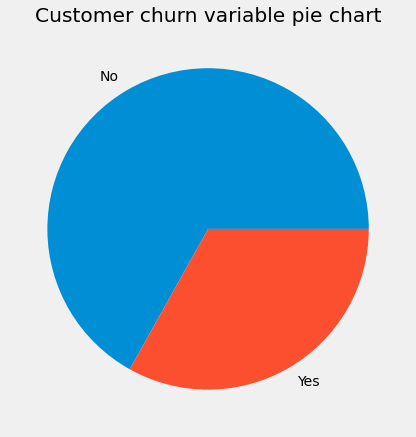

In [10]:
# pie chart
slices = churn['CHURN'].value_counts(normalize = True) 
labels = ['No', 'Yes'] 
plt.figure(figsize = (8, 6))
plt.pie(slices, labels=labels) 
plt.tight_layout() 
plt.title('Customer churn variable pie chart')
plt.show()

### Numerical variable 
- Numerical features in this dataset are the columns with unique values greater than 8, irrespective of the datatype they are. 


In [5]:
# list comprehension
num_var = [feature for feature in churn.columns if churn[feature]. nunique() > 9]
num_var

['CUSTOMER_ID',
 'Total_Sale',
 'STD_Sales',
 'Hist_Visits',
 'W1_Min_Sale',
 'W1_STD_Sales',
 'W2_Min_Sale',
 'W2_STD_Sales',
 'W3_Sale',
 'W3_Max_Sale',
 'W3_Min_Sale',
 'W3_STD_Sales',
 'W4_Sale',
 'W4_Min_Sale',
 'W4_STD_Sales',
 'W5_STD_Sales',
 'APV',
 'Days_since_last_visit']

### Histogram Distribution plot

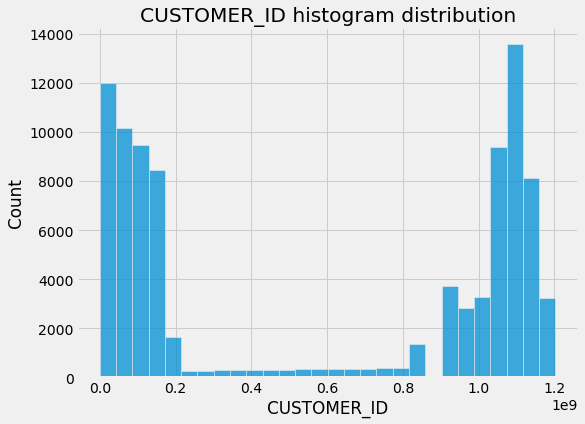

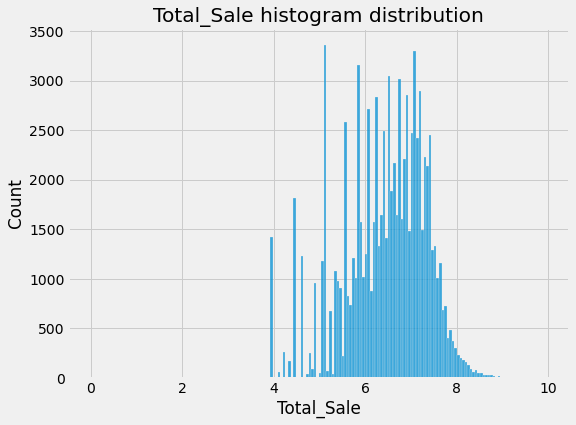

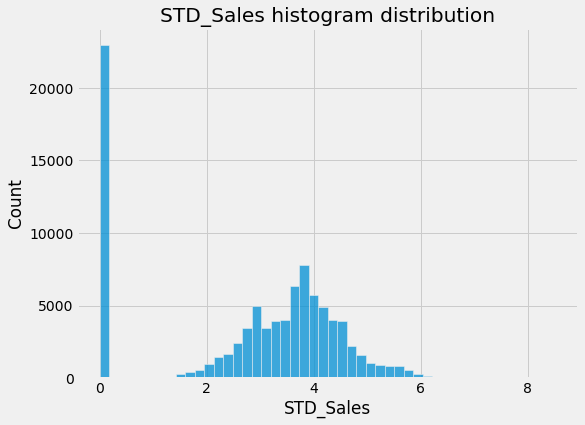

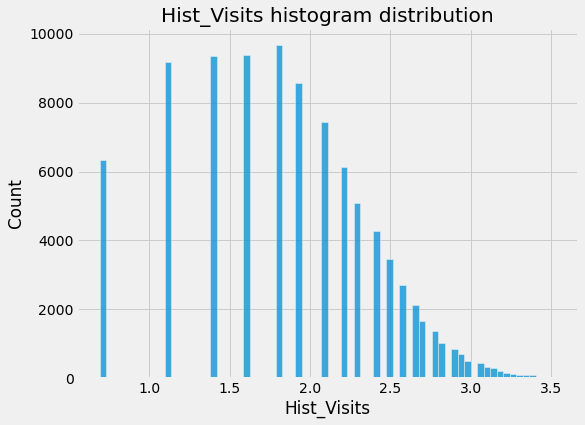

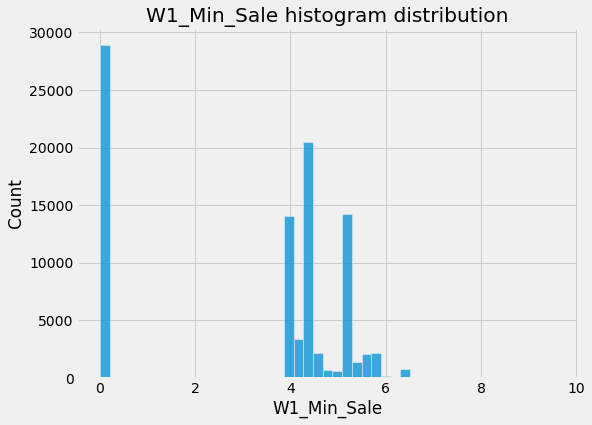

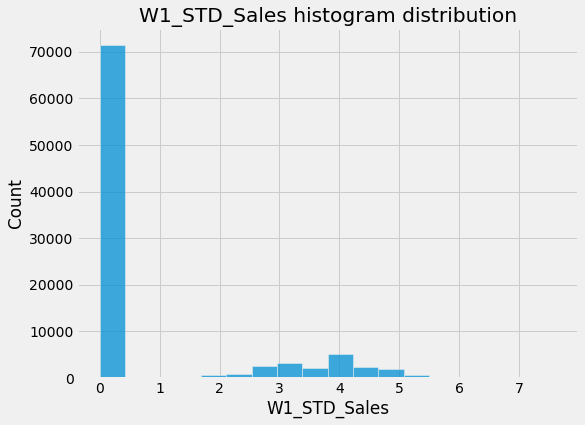

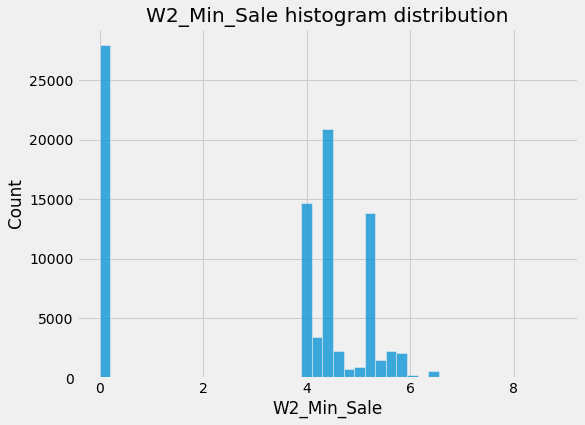

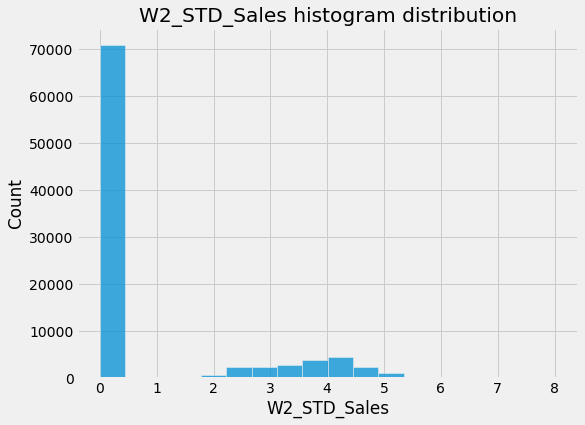

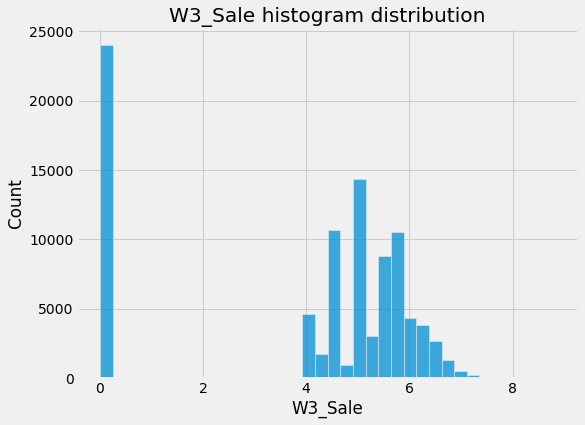

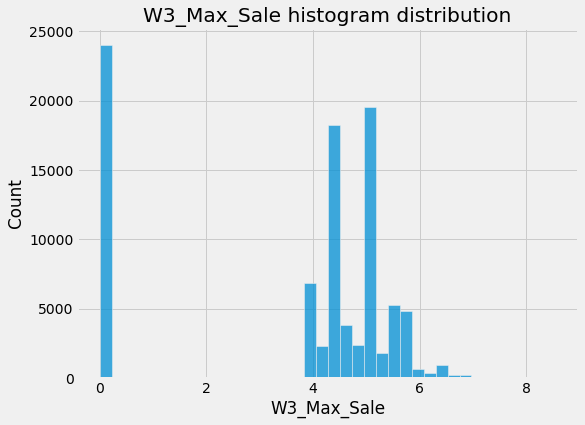

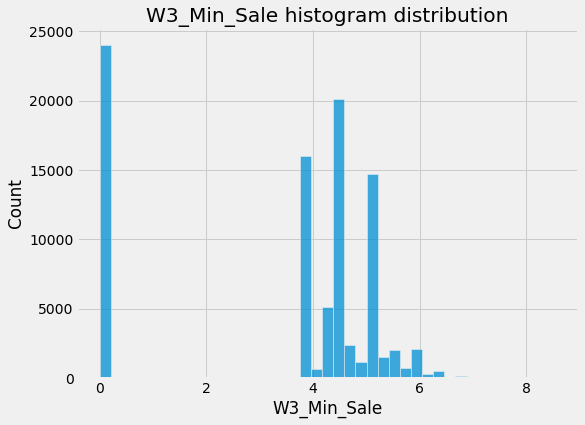

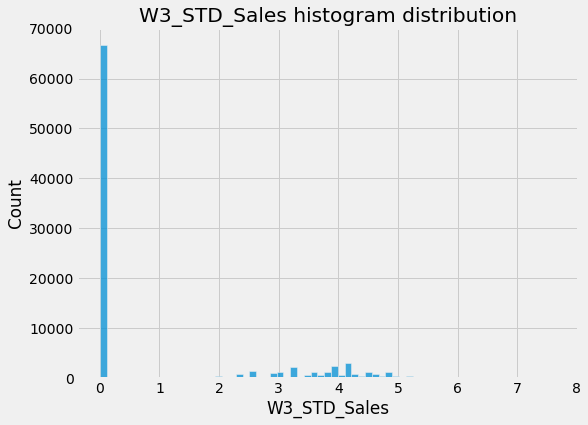

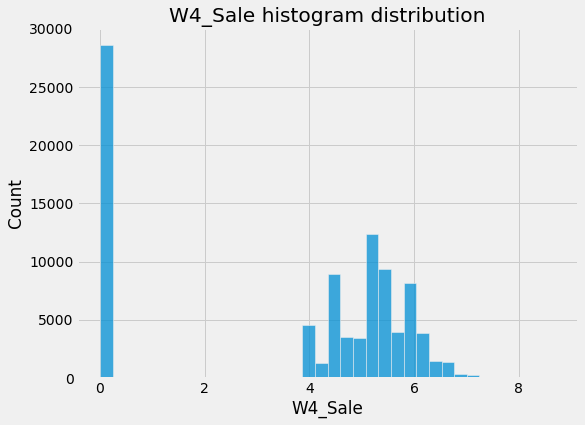

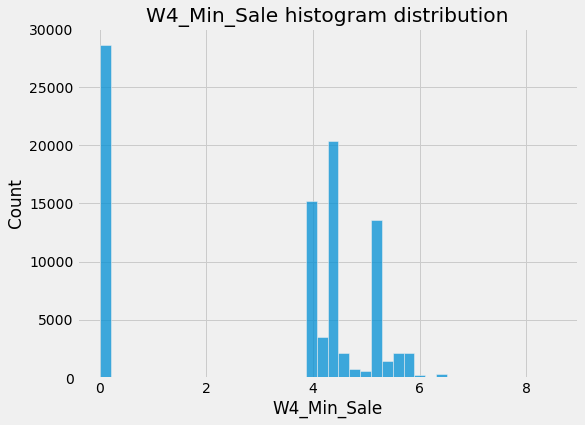

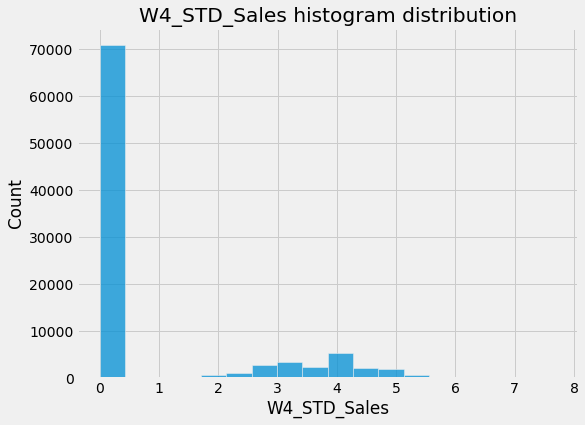

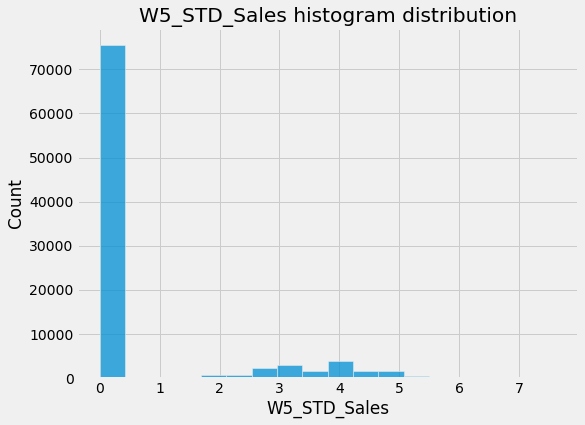

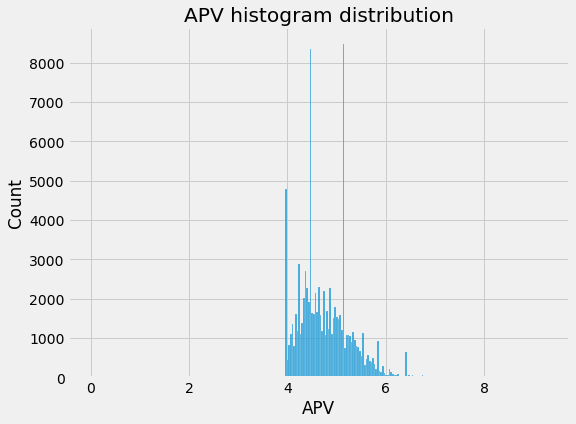

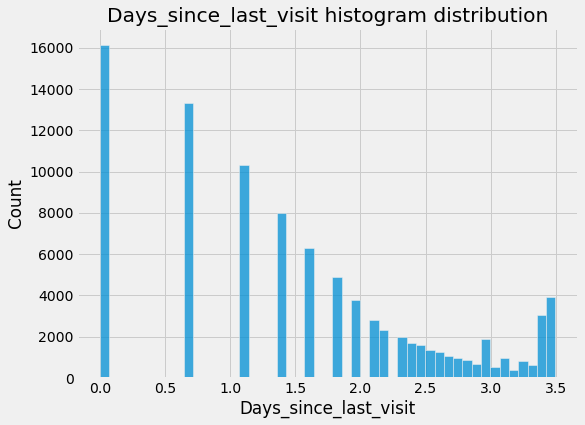

In [12]:
# for loop 
for feature in num_var: 
    # make a copy of the dataframe
    data = churn.copy() 
    # plot a distribution plot 
    plt.figure(figsize = (8, 6))
    sns.histplot(data[feature]) 
    plt.title(f'{feature} histogram distribution')
    plt.show()

### Boxplot 
- To reveal the outliers in each variable

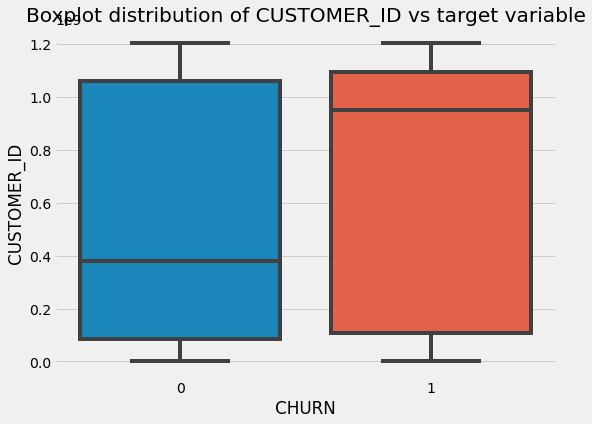

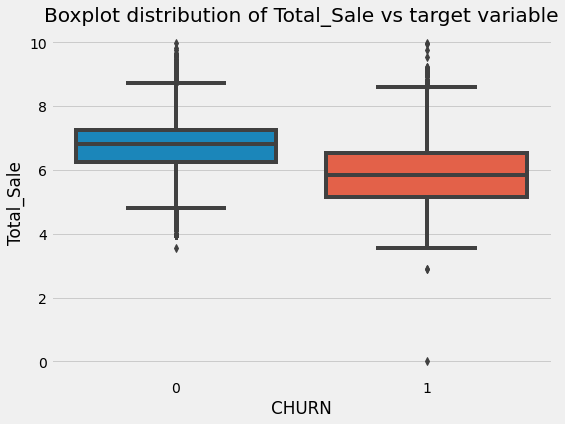

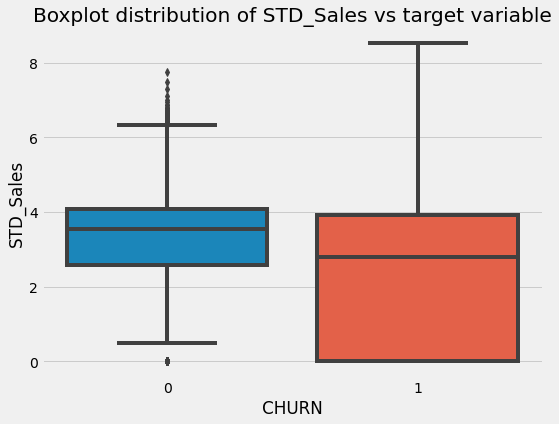

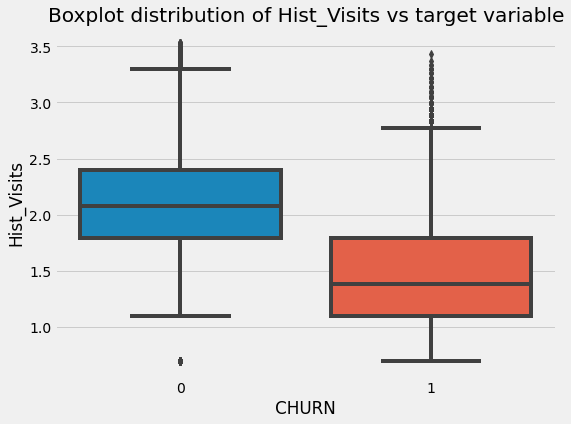

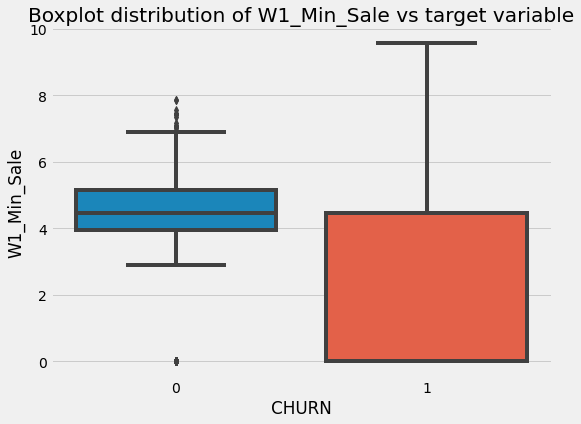

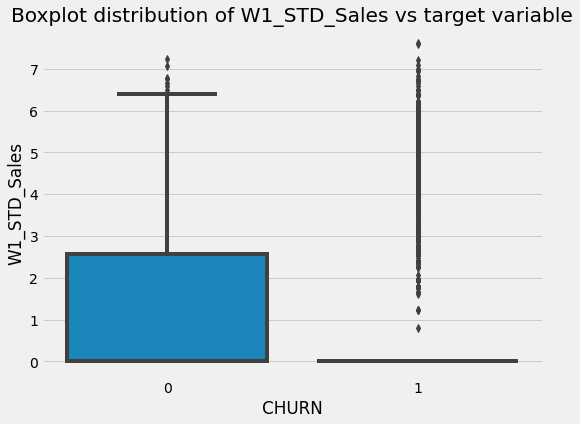

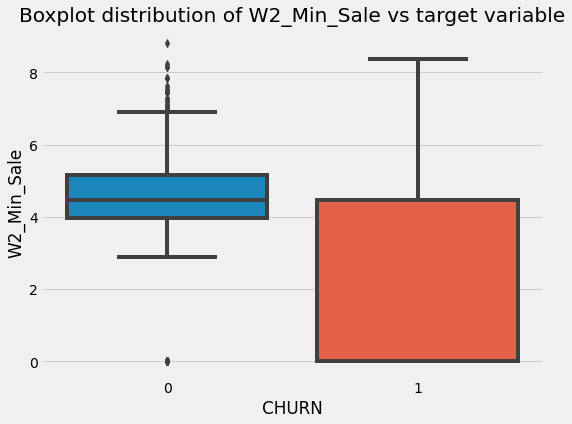

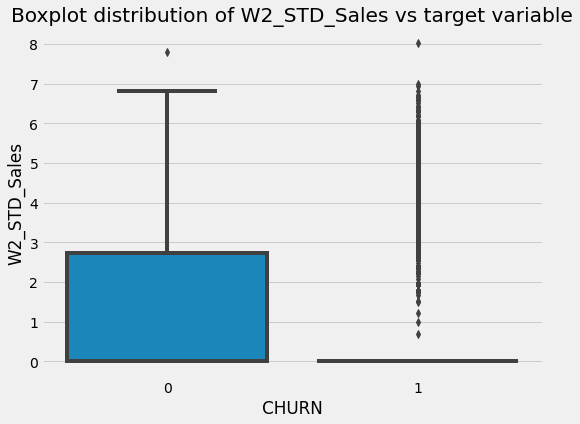

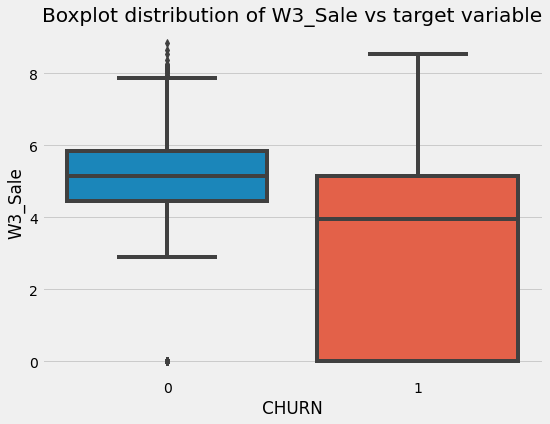

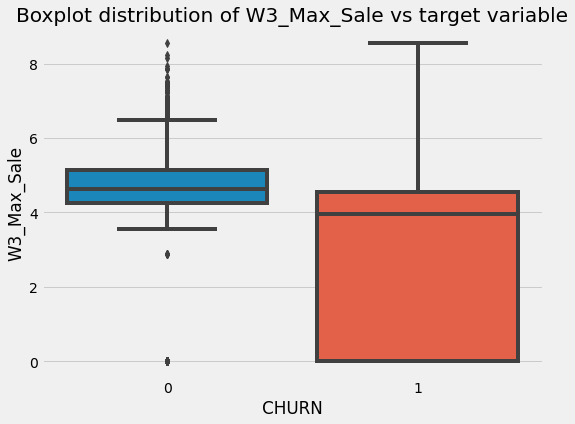

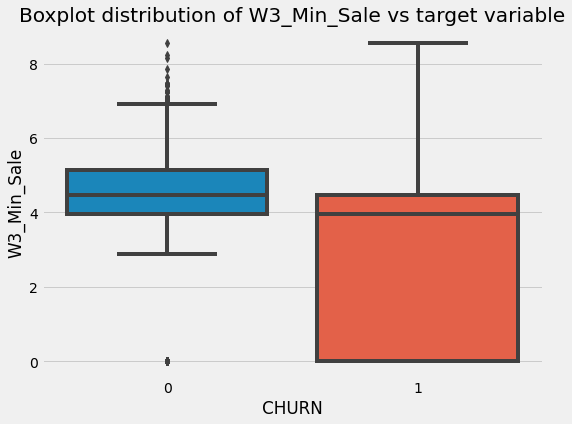

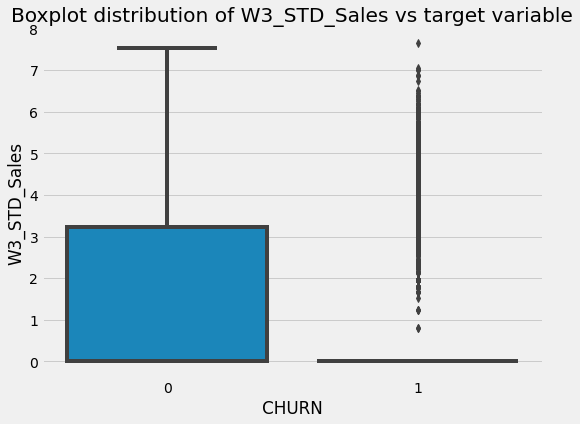

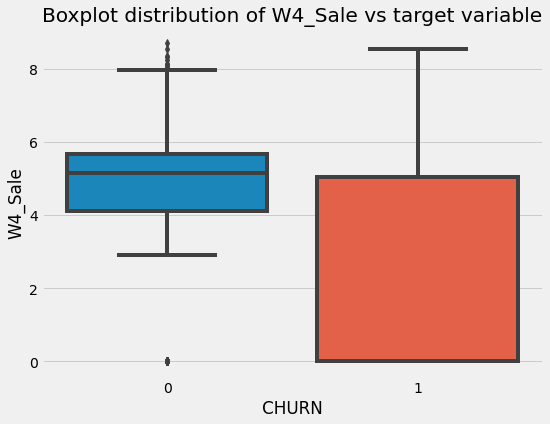

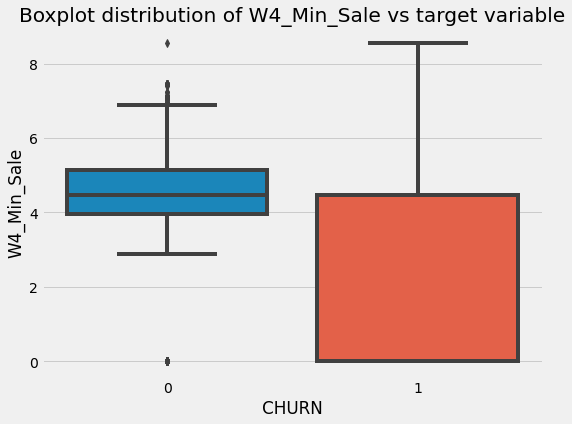

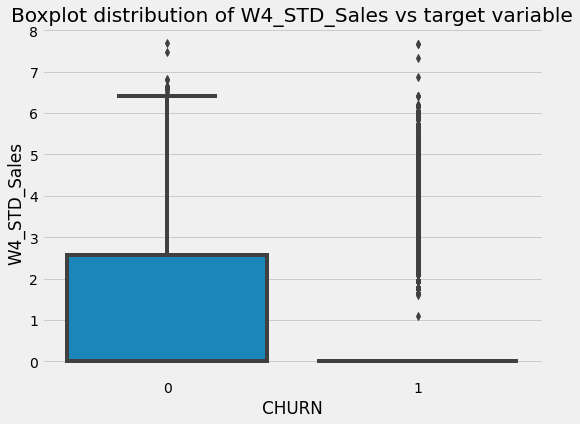

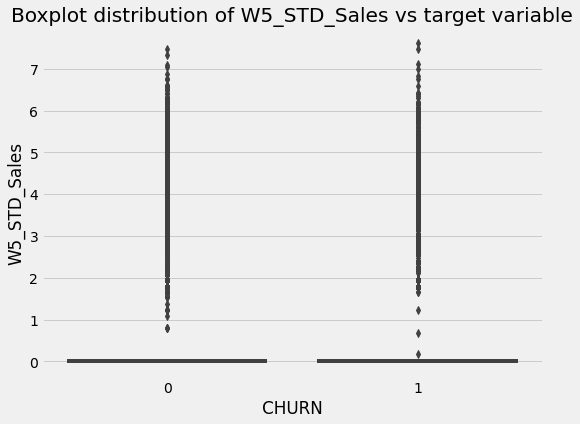

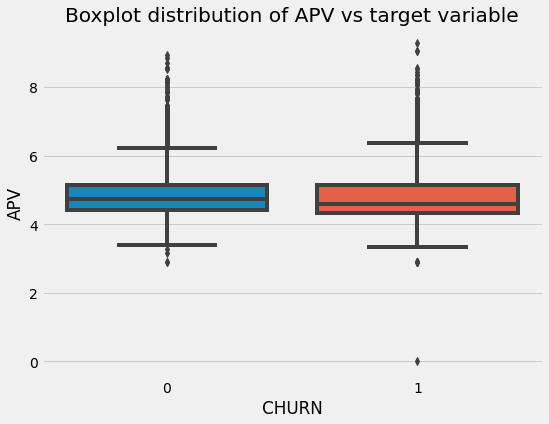

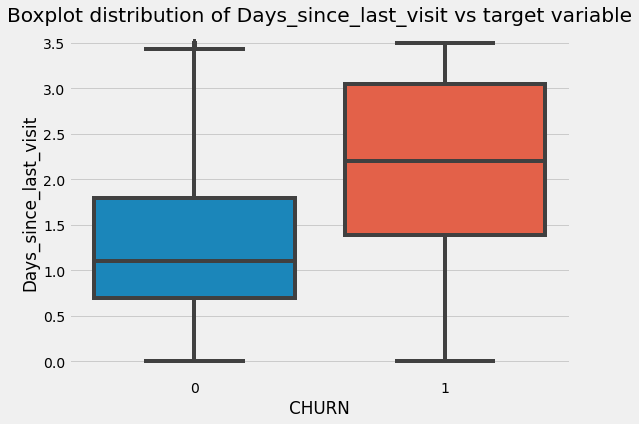

In [14]:
# for loop 
for feature in num_var:
    # make a copy of the dataframe
    data = churn.copy()
    # plot a boxplot 
    plt.figure(figsize = (8, 6))
    sns.boxplot(x="CHURN", y=feature, data=data) 
    plt.title(f'Boxplot distribution of {feature} vs target variable')
    plt.show()

### Numerical Variable vs Churn

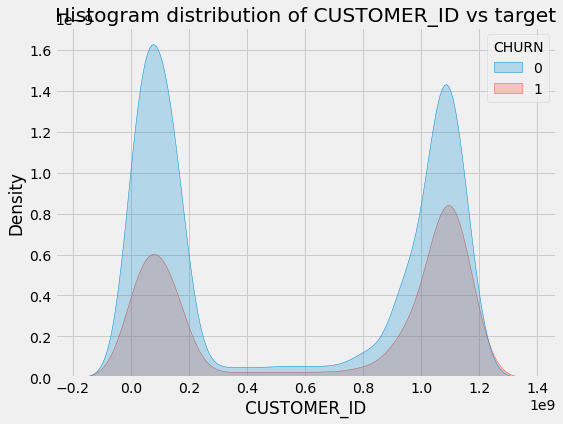

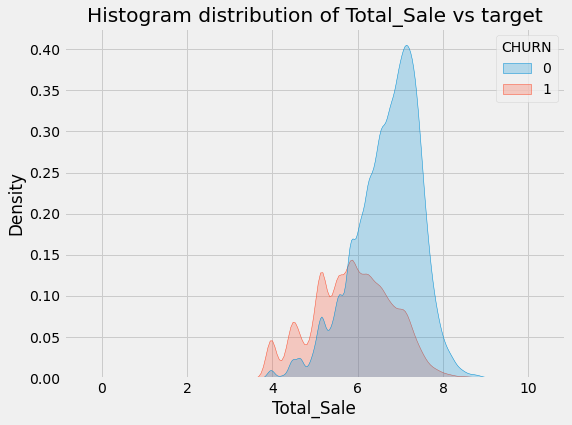

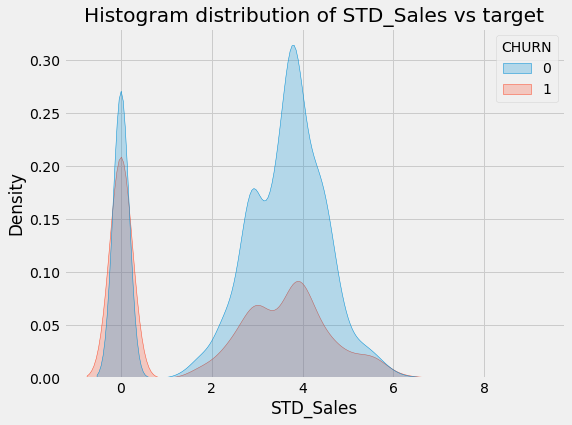

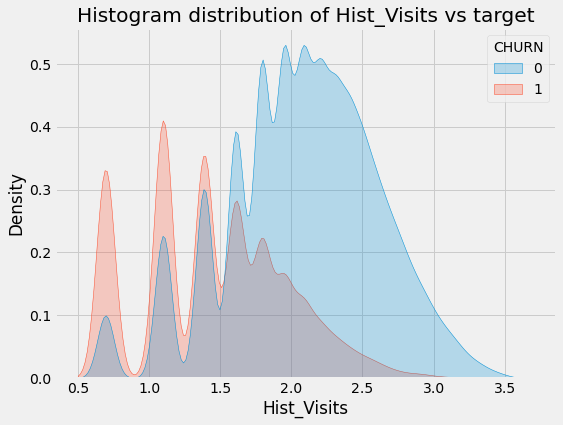

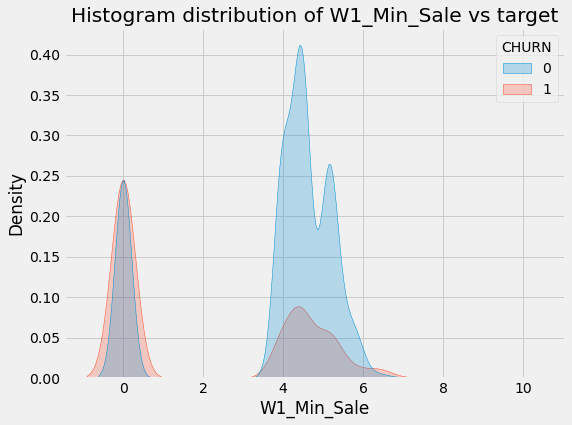

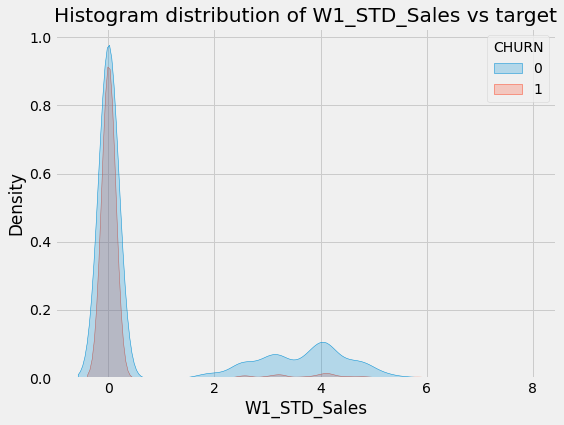

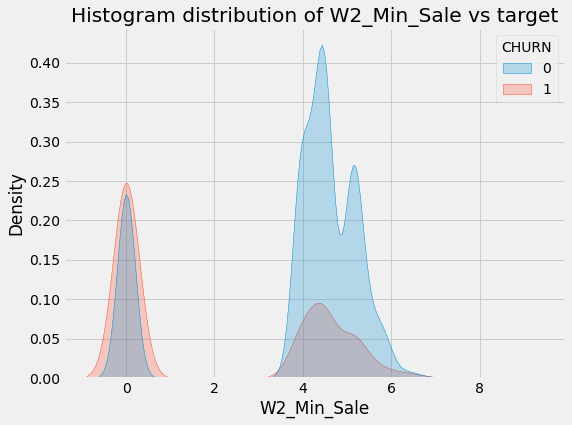

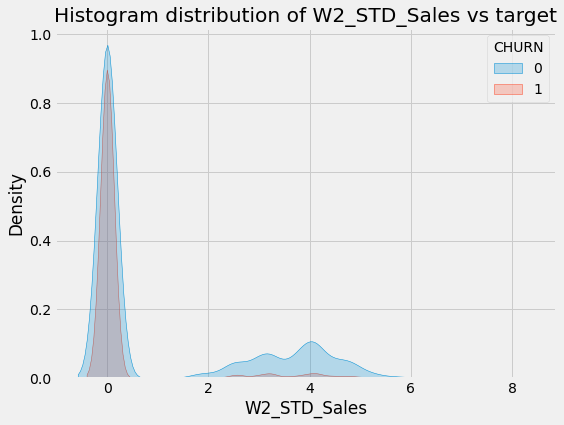

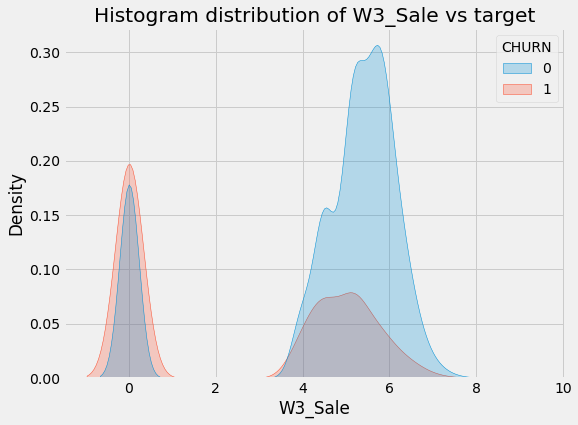

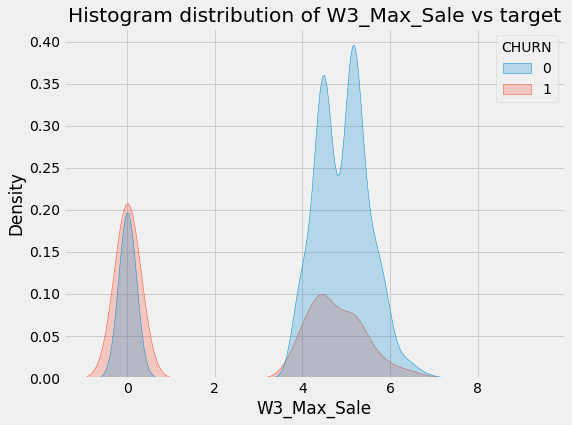

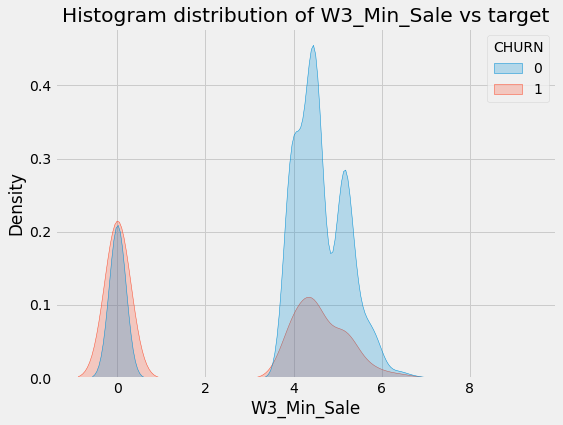

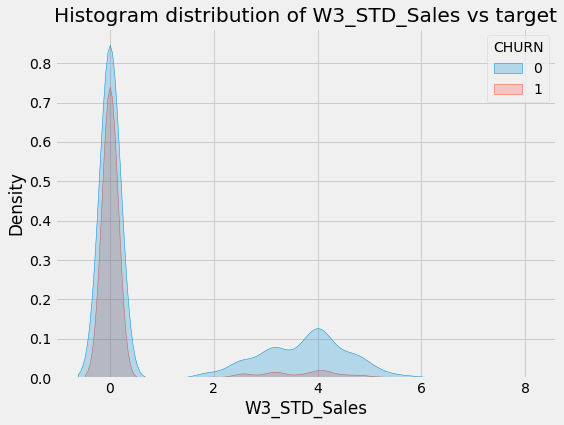

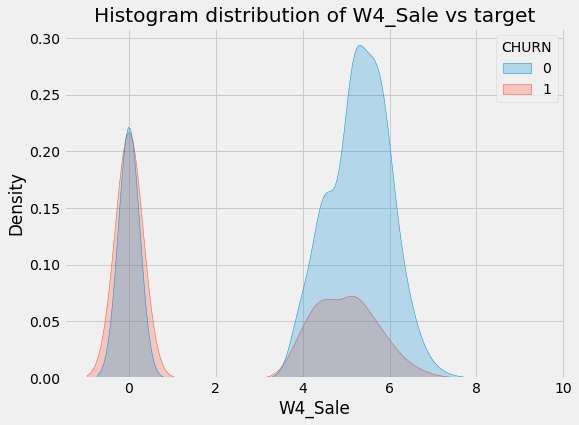

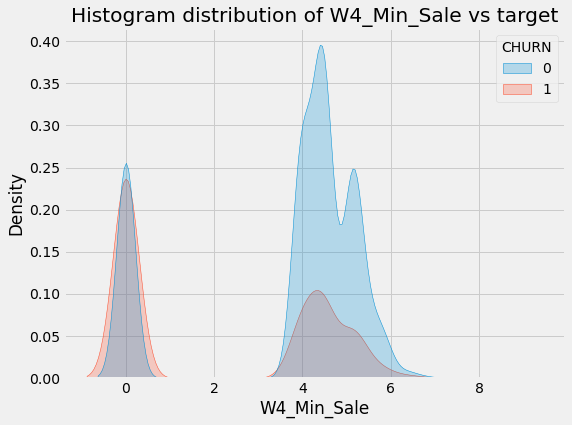

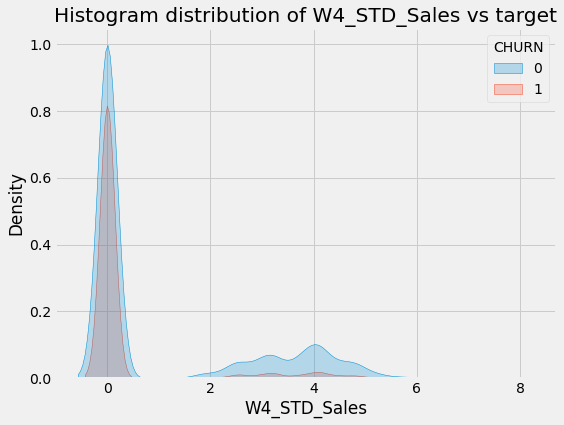

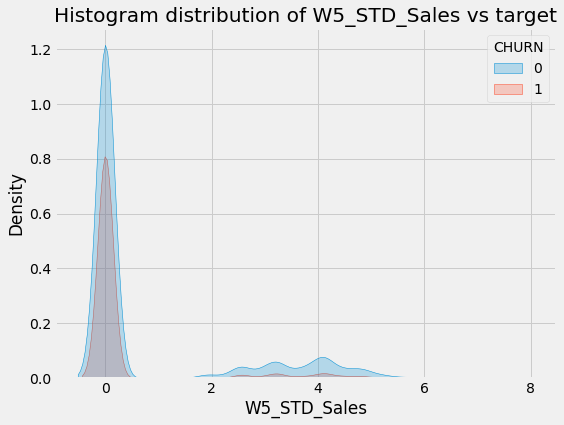

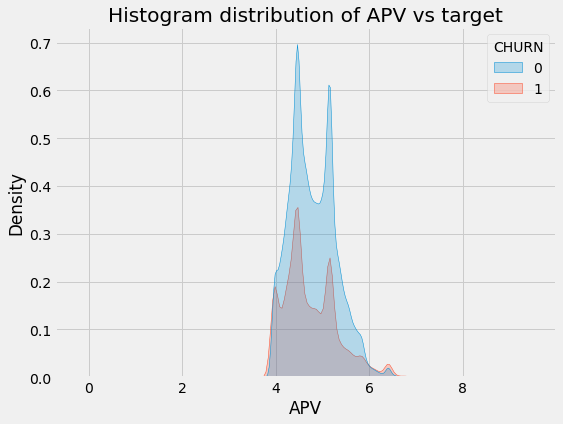

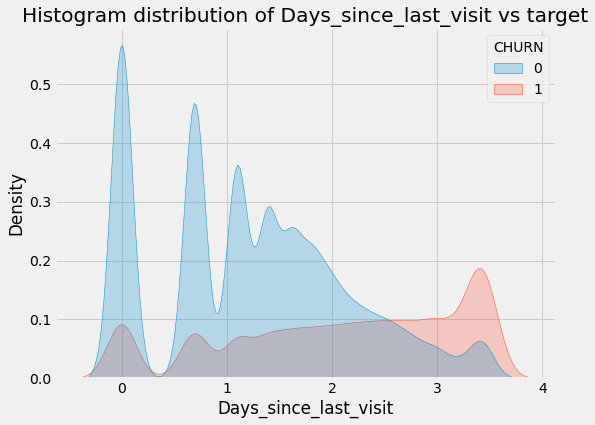

In [15]:
# for loop 
for feature in num_var: 
    # make a copy of the dataframe
    data = churn.copy() 
    # plot a distribution plot 
    plt.figure(figsize = (8, 6))
    sns.kdeplot(data[feature], hue = data['CHURN'], shade = True) 
    plt.title(f'Histogram distribution of {feature} vs target')
    plt.show()

### Pairplot

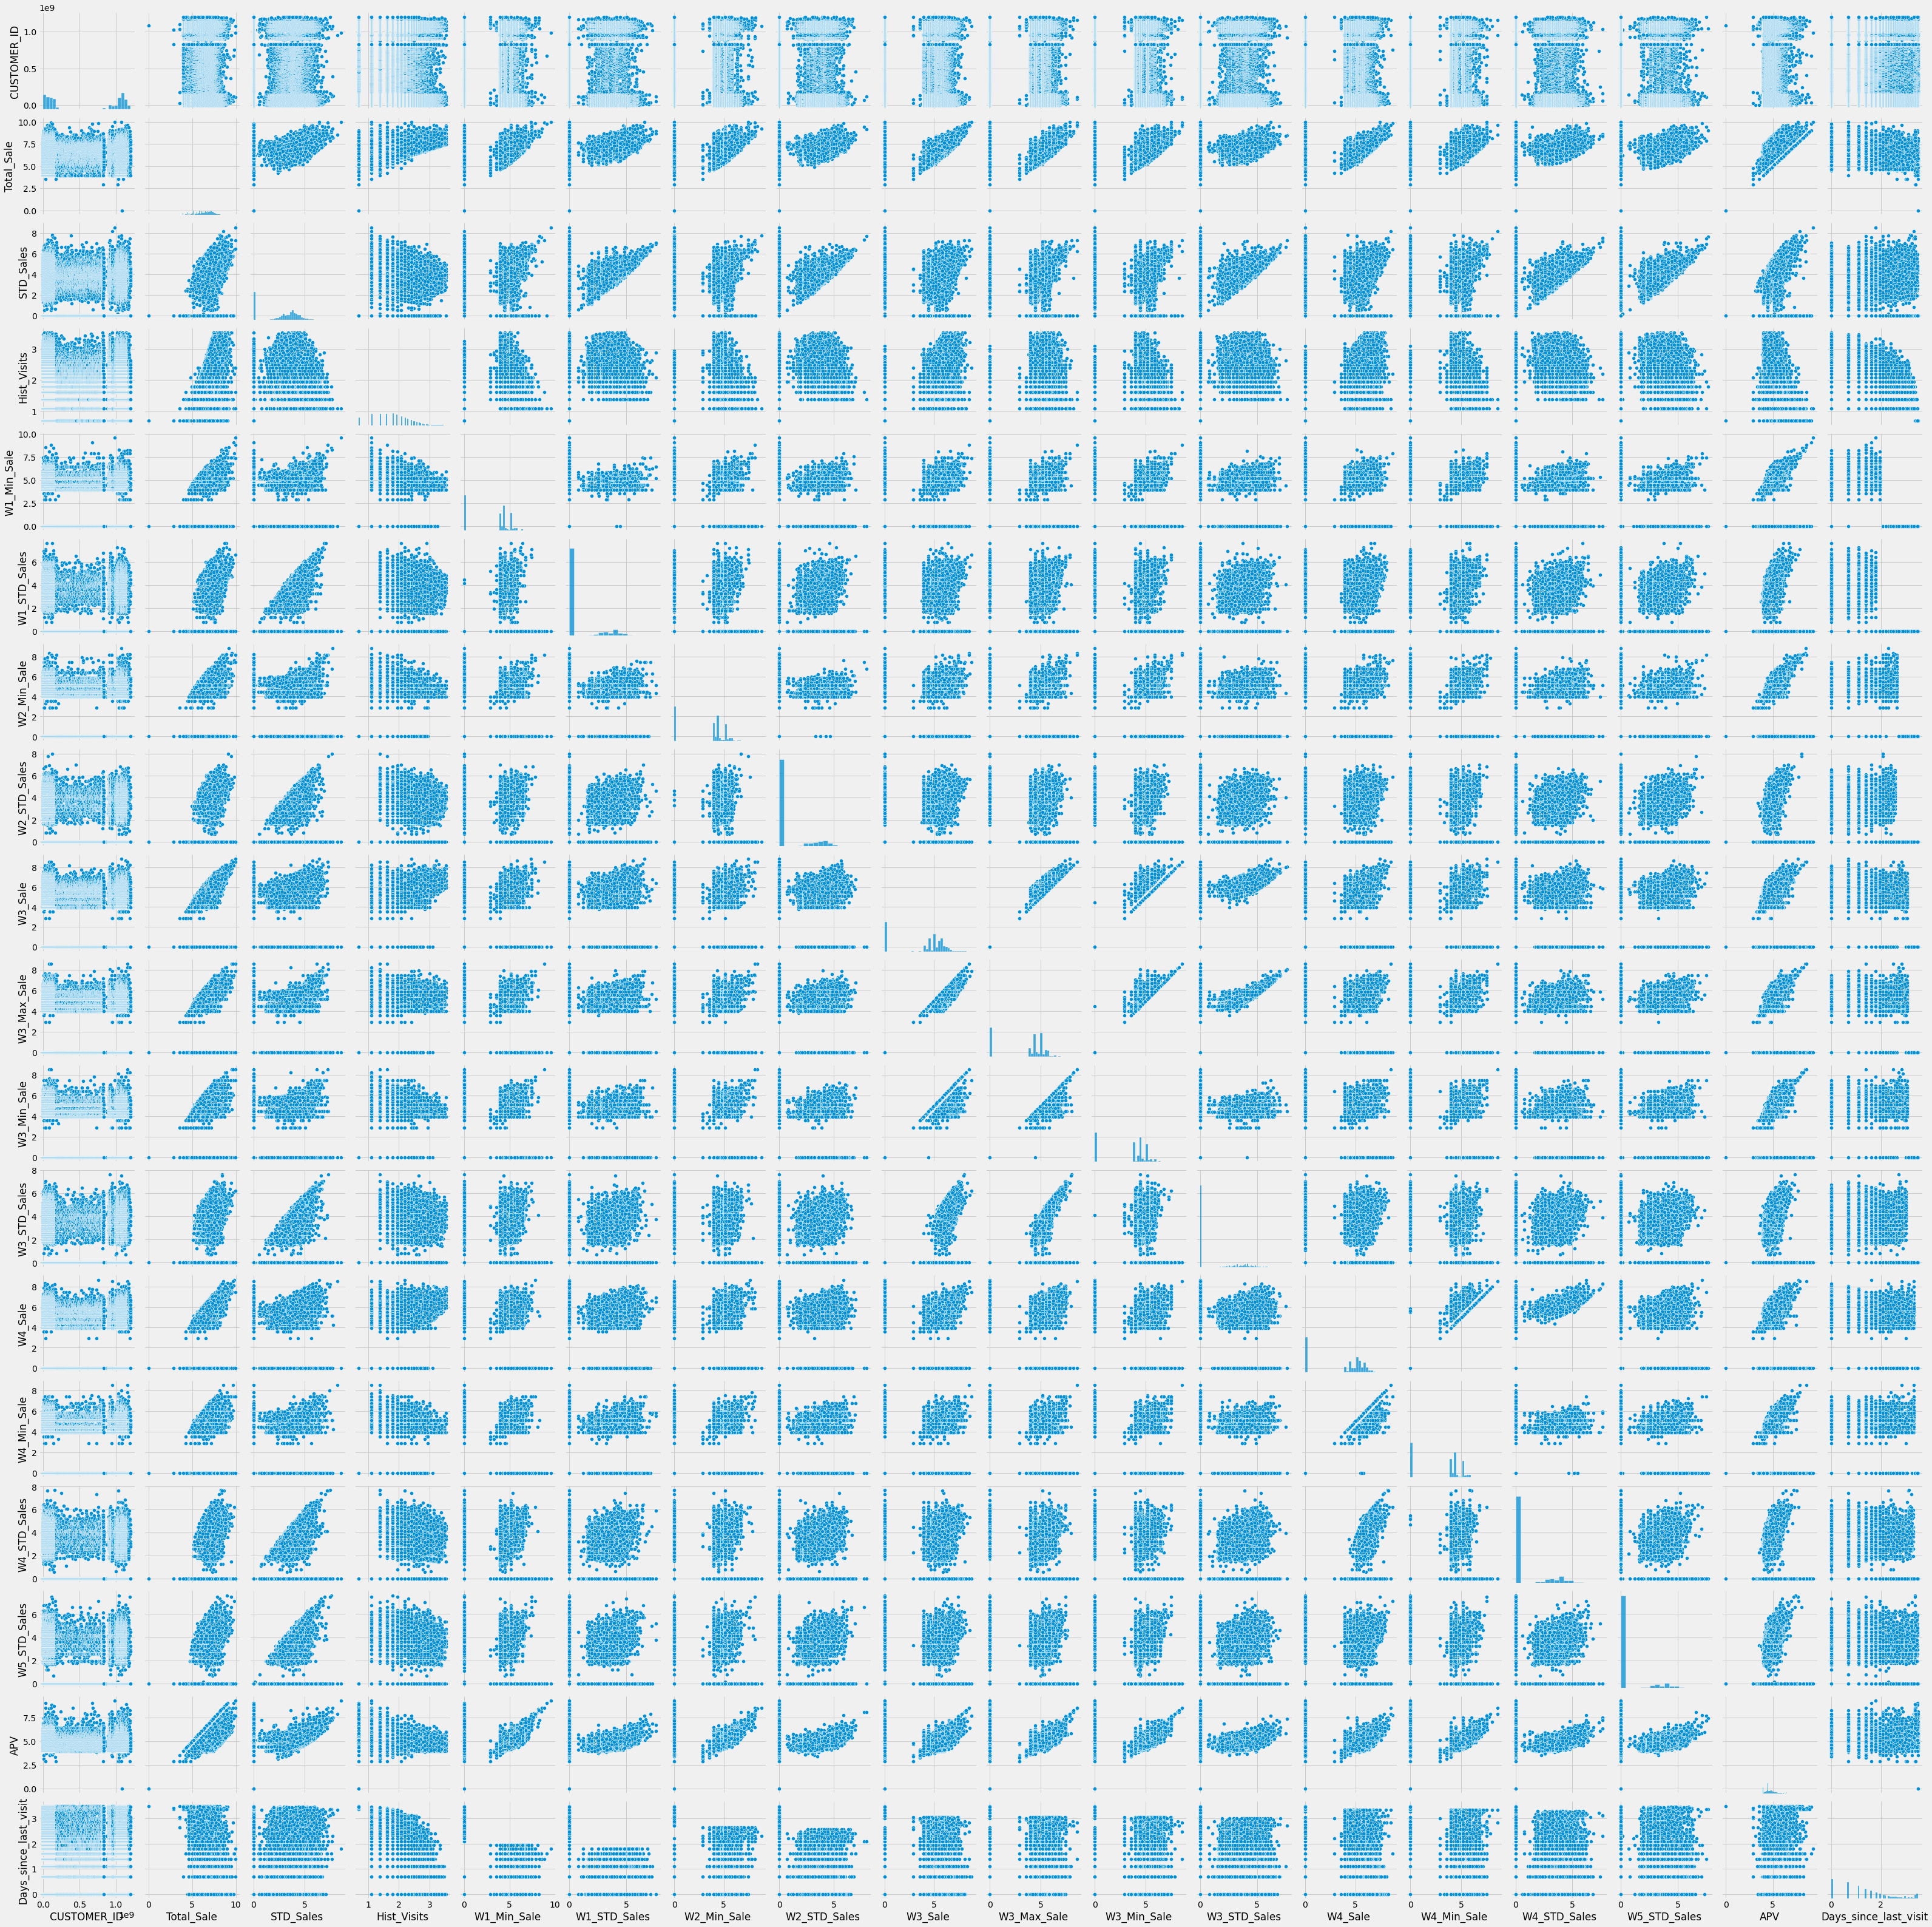

In [54]:
sns.pairplot(churn[num_var])

### Categorical Variables 
- Categorical features in this dataset are the columns with unique values equal to or lesser than 8, irrespective of the datatype they are.

In [4]:
cat_var = [feature for feature in churn.columns if churn[feature].nunique() <= 8]
cat_var

['W1_Visits',
 'W2_Visits',
 'W3_Visits',
 'W4_Visits',
 'W5_Visits',
 'week_1',
 'week_2',
 'week_3',
 'week_4',
 'CHURN',
 'Customer_Value',
 'High_value',
 'Low_value',
 'Regular',
 'Visitors_Type',
 'Rare_Visitors',
 'Frequent_Visitors',
 'Regular_Visitors']

In [17]:
# Number of unique values 
for feature in cat_var:
    data = churn.copy()
    print(f'{feature} : {data[feature].nunique()} unique values')

W1_Visits : 8 unique values
W2_Visits : 8 unique values
W3_Visits : 8 unique values
W4_Visits : 8 unique values
W5_Visits : 5 unique values
week_1 : 2 unique values
week_2 : 2 unique values
week_3 : 2 unique values
week_4 : 2 unique values
CHURN : 2 unique values
Customer_Value : 3 unique values
High_value : 2 unique values
Low_value : 2 unique values
Regular : 2 unique values
Visitors_Type : 3 unique values
Rare_Visitors : 2 unique values
Frequent_Visitors : 2 unique values
Regular_Visitors : 2 unique values


### Cardinality of the Catgorical Variables 

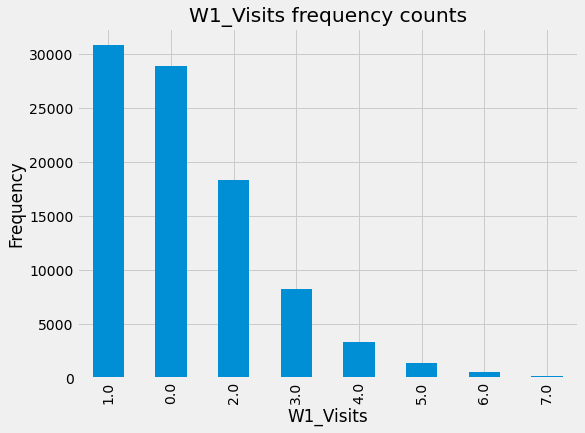

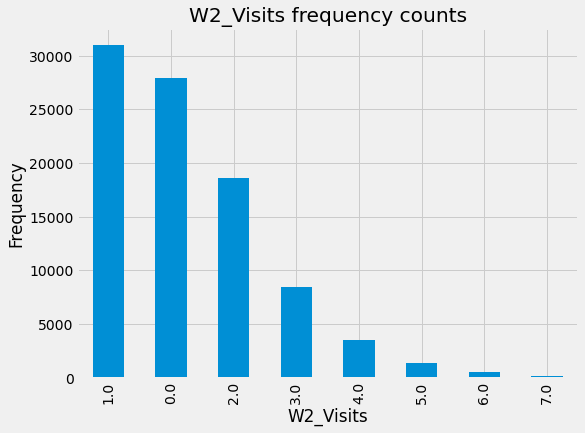

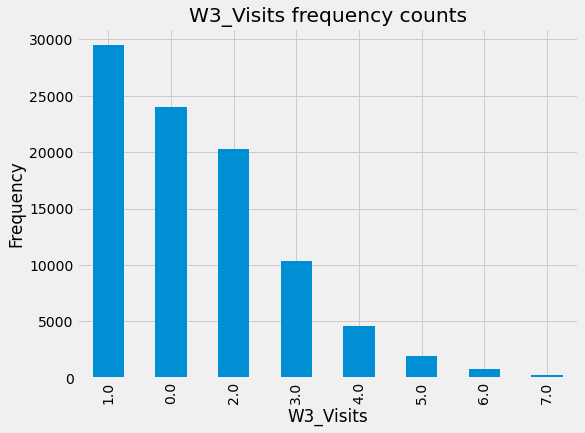

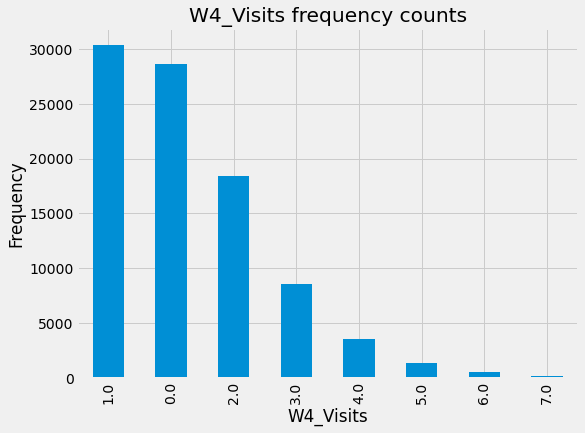

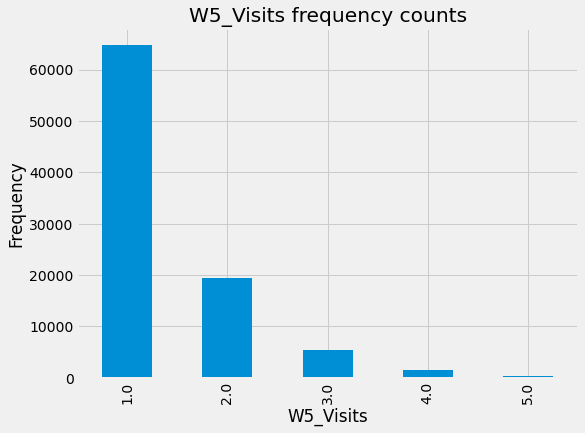

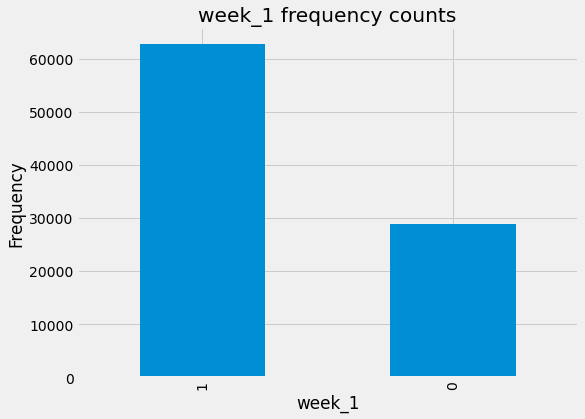

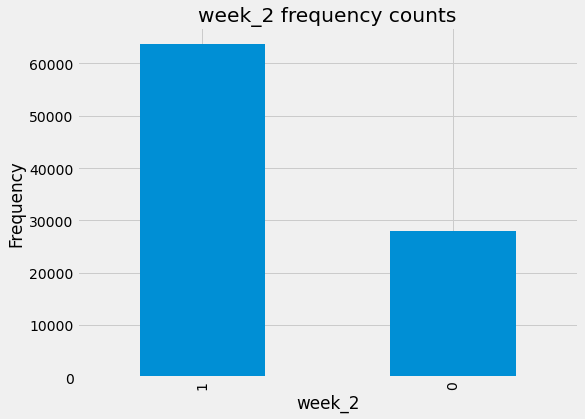

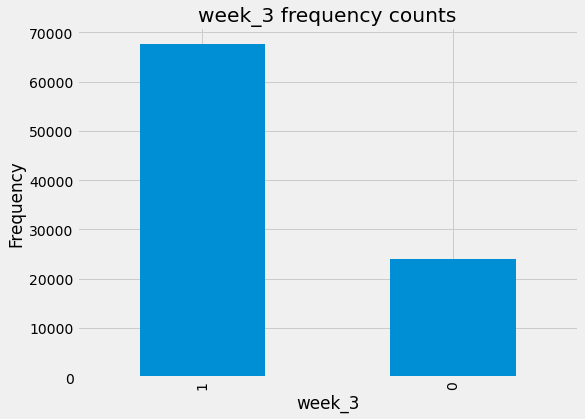

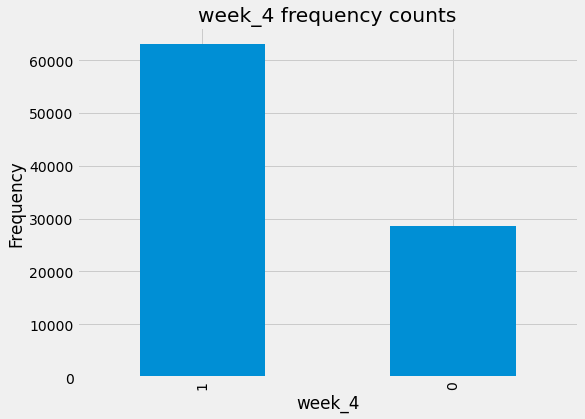

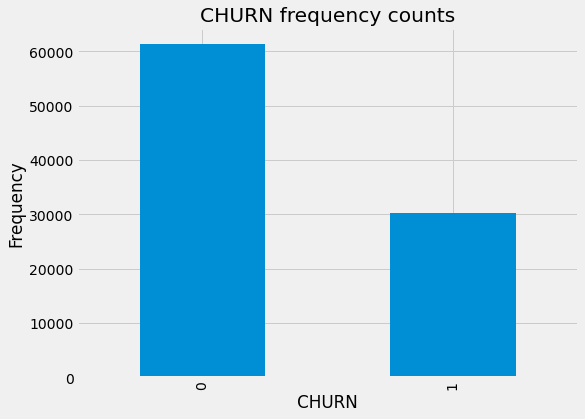

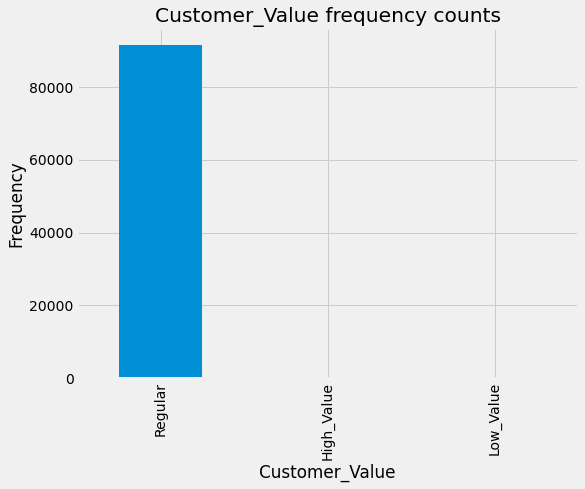

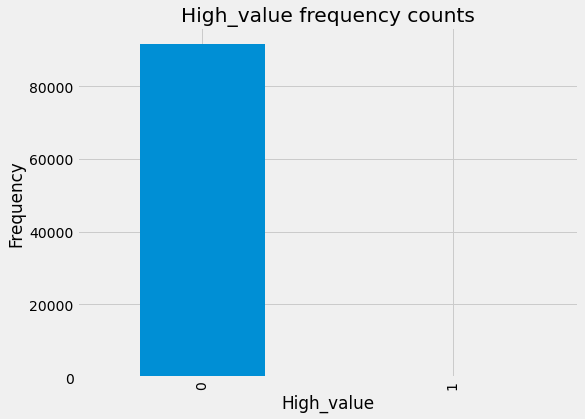

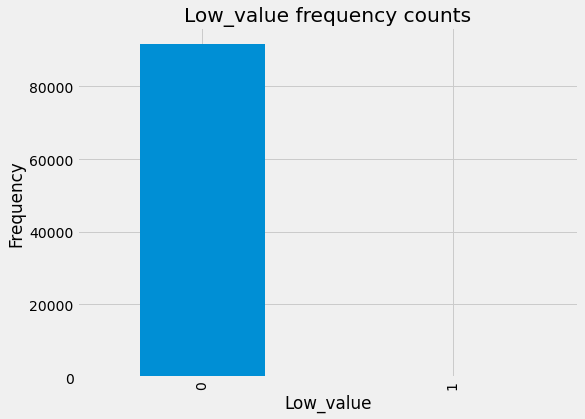

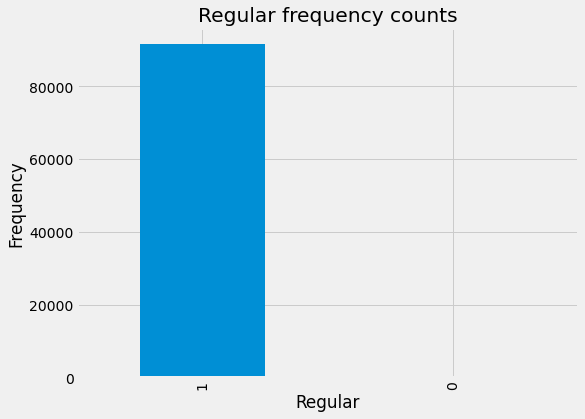

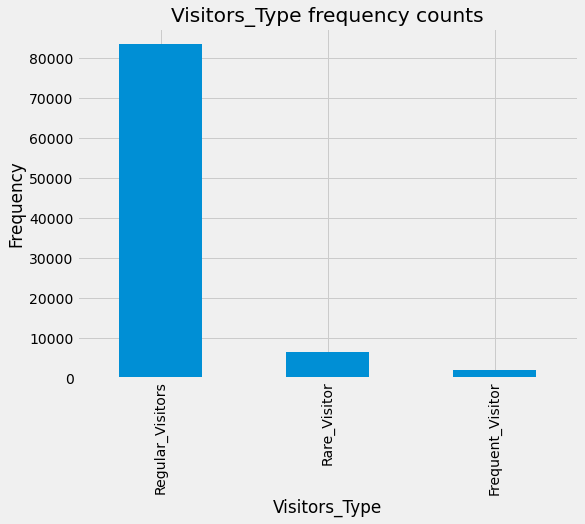

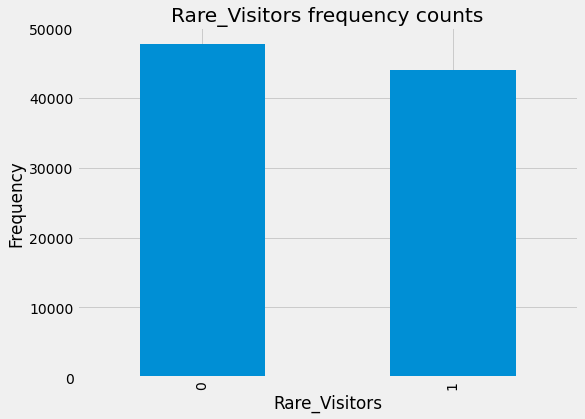

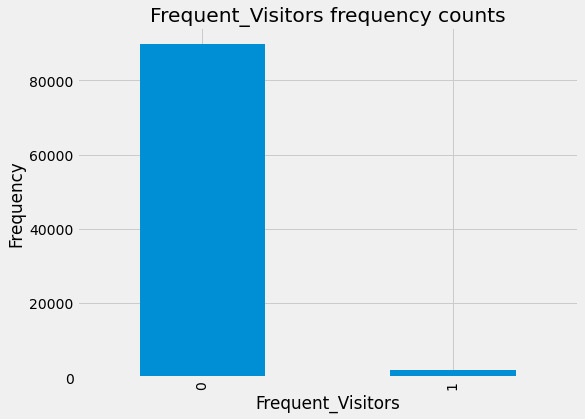

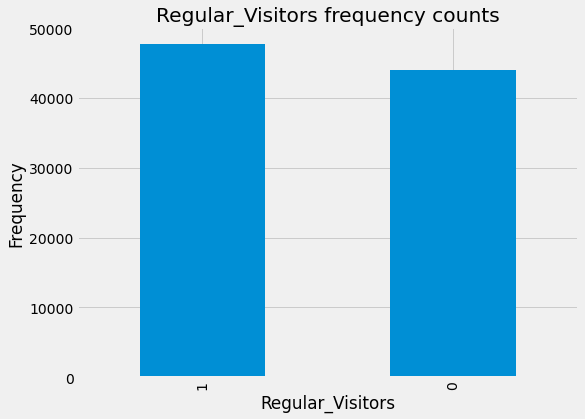

In [19]:
# Value counts 
for feature in cat_var:
    data = churn.copy()
    plt.figure(figsize = (8, 6))
    data[feature].value_counts().plot(kind = 'bar')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'{feature} frequency counts')
    plt.show()

### Categorical variables vs Target variable

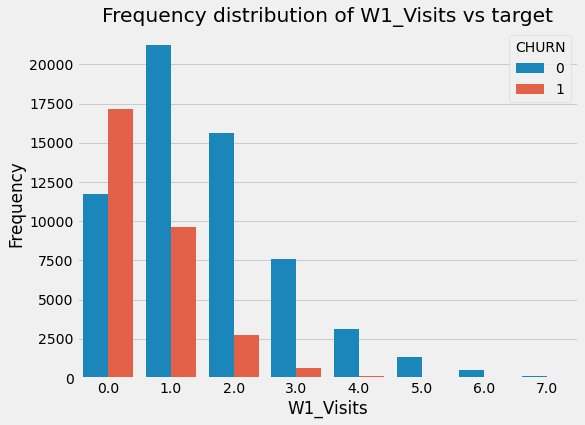

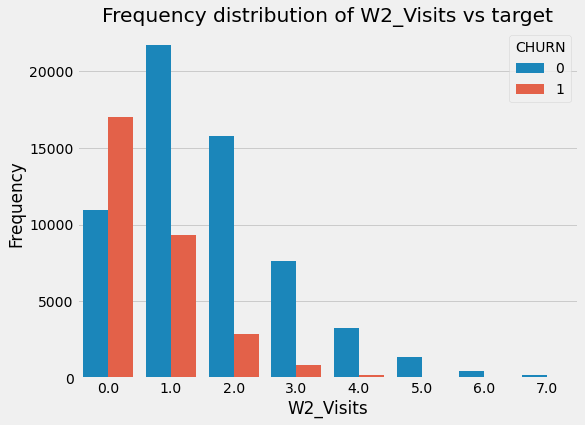

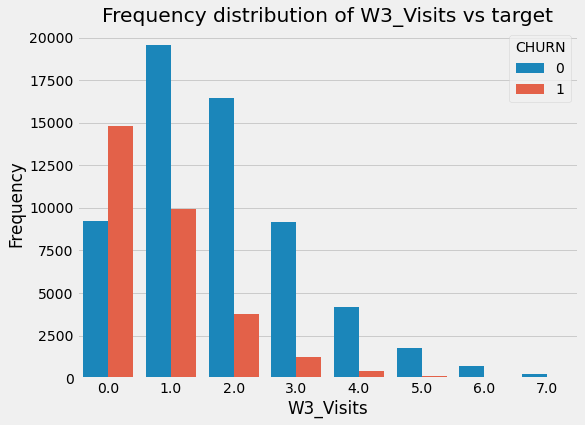

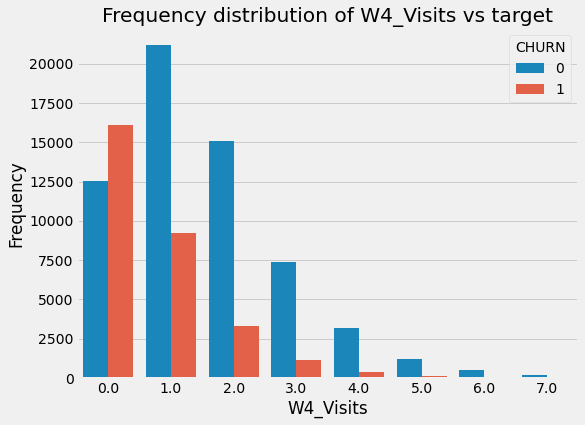

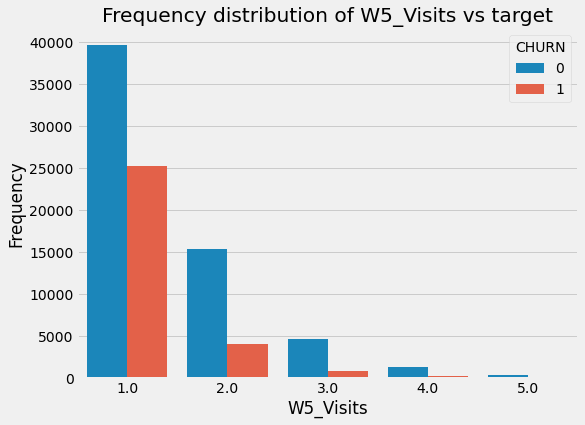

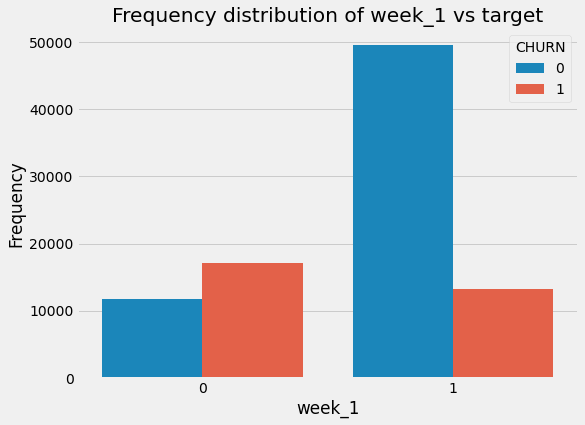

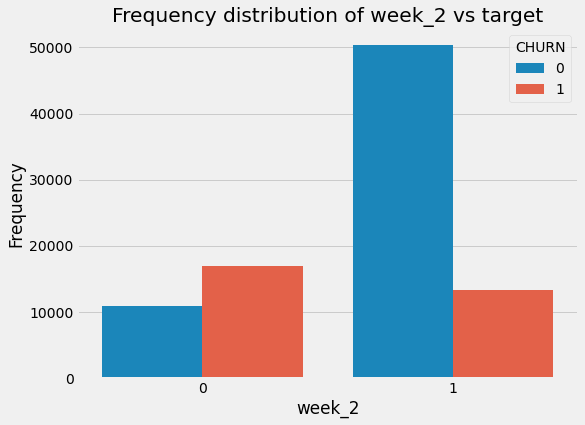

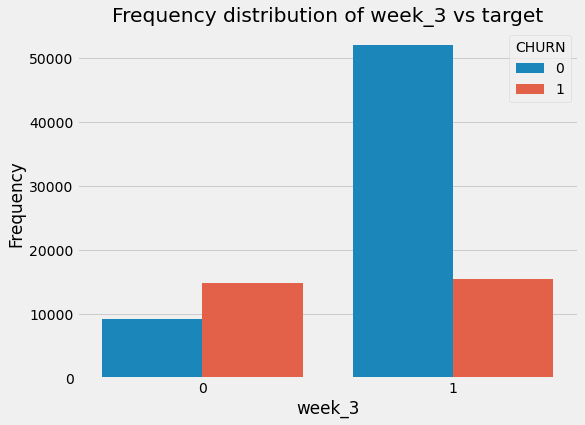

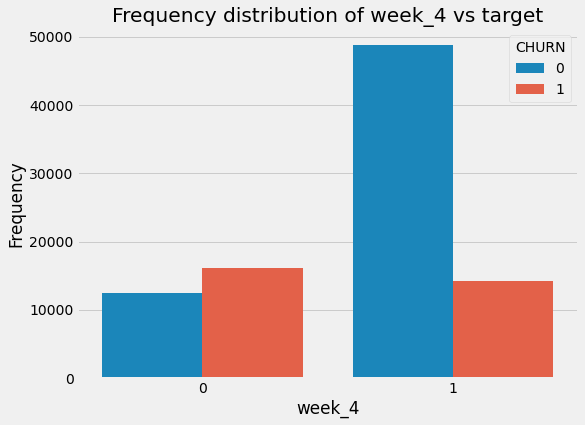

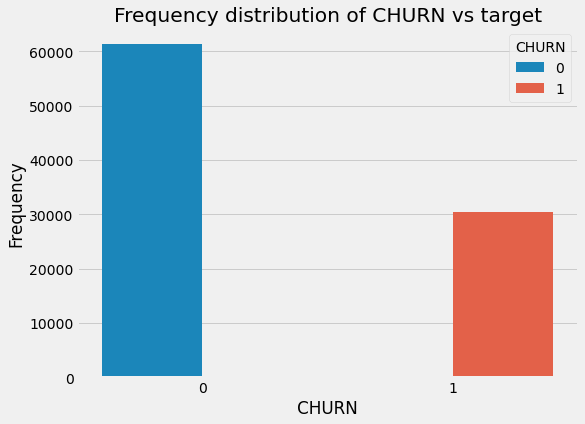

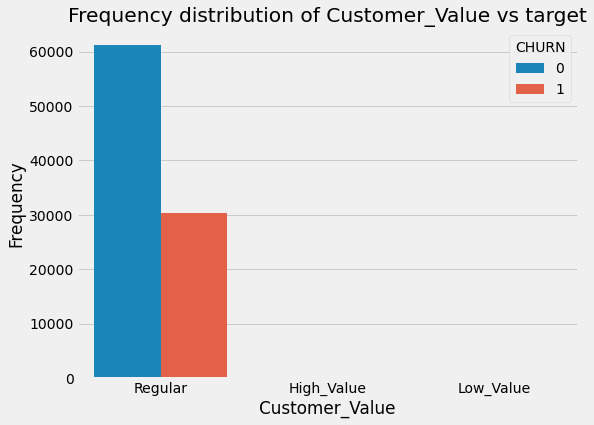

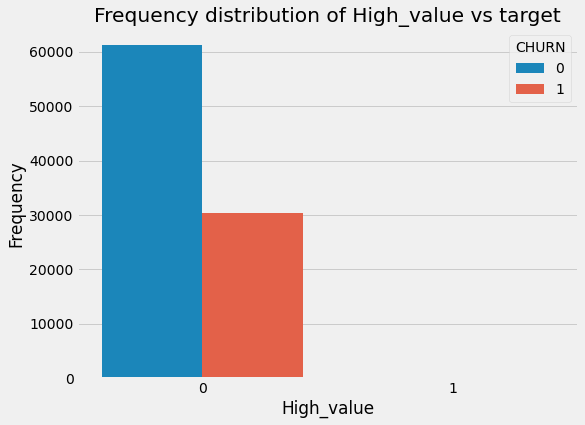

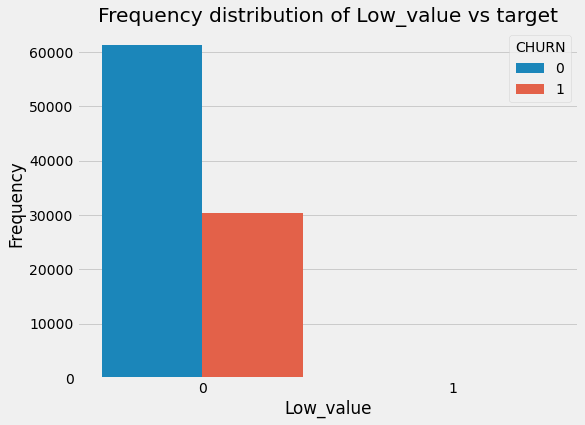

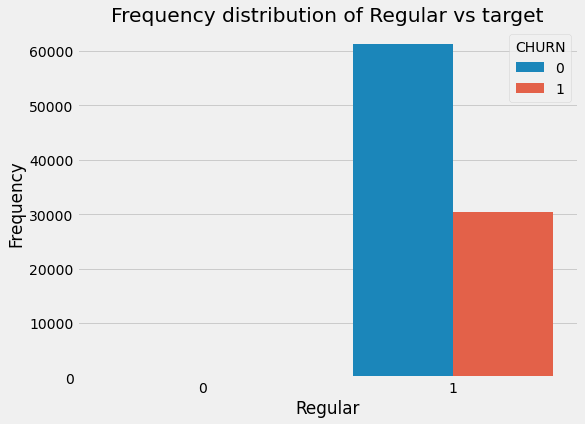

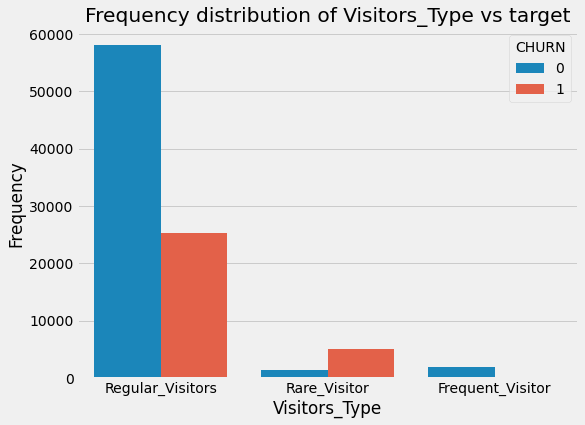

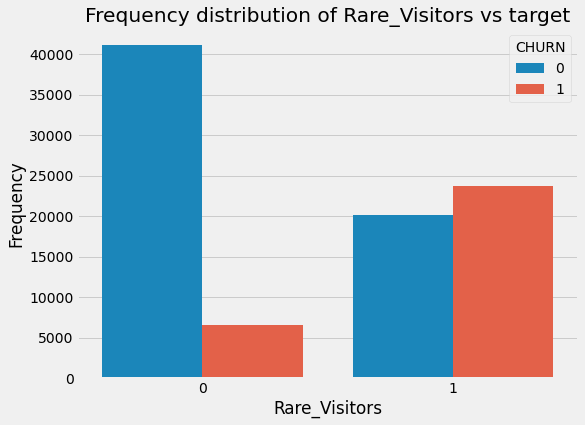

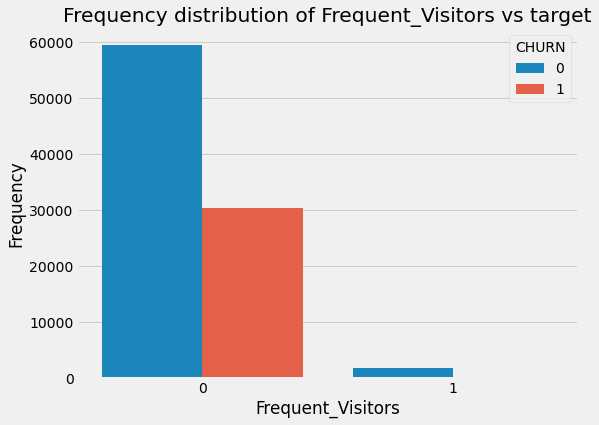

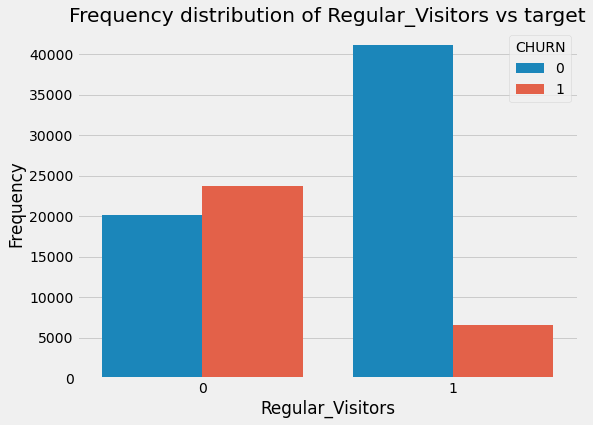

In [20]:
# Value counts 
for feature in cat_var:
    data = churn.copy()
    plt.figure(figsize = (8, 6))
    sns.countplot(x = feature, data=data, hue='CHURN')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Frequency distribution of {feature} vs target')
    plt.show()

### Feature Engineering: Frequency encoding

In [6]:
churn.head()

CUSTOMER_ID  Total_Sale  STD_Sales  Hist_Visits  W1_Min_Sale  W1_STD_Sales  \
0         7260    7.585687   3.988061     2.708050     4.241039      3.958143   
1        11024    6.338523   3.163263     2.302585     3.958143      2.573045   
2        12476    5.043941   0.000000     1.386294     0.000000      0.000000   
3        14156    6.648207   3.670753     1.791759     5.148657      0.000000   
4        17606    5.838896   0.000000     1.098612     5.148657      0.000000   

   W1_Visits  W2_Min_Sale  W2_STD_Sales  W2_Visits   W3_Sale  W3_Max_Sale  \
0        4.0     4.926964      3.033436        3.0  6.243390     5.552184   
1        2.0     3.958143      0.000000        1.0  5.043941     3.958143   
2        0.0     3.958143      0.000000        1.0  3.958143     3.958143   
3        1.0     5.148657      0.000000        1.0  4.461300     4.461300   
4        1.0     0.000000      0.000000        0.0  0.000000     0.000000   

   W3_Min_Sale  W3_STD_Sales  W3_Visits   W4_Sale  W4_Min_Sale  W4_STD_Sales  \
0     4.461300        4.4613        4.0  5.552184     4.461300      4.119498   
1     3.958143        0.0000        3.0  5.148657     3.958143      3.900409   
2     3.958143        0.0000        1.0  0.000000     0.000000      0.000000   
3     4.461300        0.0000        1.0  5.148657     5.148657      0.000000   
4     0.000000        0.0000        0.0  0.000000     0.000000      0.000000   

   W4_Visits  W5_STD_Sales  W5_Visits  week_1  week_2  week_3  week_4  \
0        2.0           0.0        1.0       1       1       1       1   
1        2.0           0.0        1.0       1       1       1       1   
2        0.0           0.0        1.0       0       1       1       0   
3        1.0           0.0        1.0       1       1       1       1   
4        0.0           0.0        1.0       1       0       0       0   

        APV  Days_since_last_visit  CHURN Customer_Value  High_value  \
0  4.953208               0.000000      0        Regular           0   
1  4.155335               0.000000      1        Regular           0   
2  3.958143               2.639057      1        Regular           0   
3  5.043941               1.386294      0        Regular           0   
4  5.148657               1.609438      1        Regular           0   

   Low_value  Regular     Visitors_Type  Rare_Visitors  Frequent_Visitors  \
0          0        1  Regular_Visitors              0                  0   
1          0        1  Regular_Visitors              0                  0   
2          0        1  Regular_Visitors              1                  0   
3          0        1  Regular_Visitors              1                  0   
4          0        1  Regular_Visitors              1                  0   

   Regular_Visitors  
0                 1  
1                 1  
2                 0  
3                 0  
4                 0

In [7]:
# columns to encode
f_encode = ['Customer_Value', 'Visitors_Type']

In [8]:
# mapping dict values with for loop
for feature in f_encode:
    map_dict = churn[feature].value_counts().to_dict()
    churn[feature] = churn[feature].map(map_dict)

In [9]:
# drop CUSTOMER_ID 
churn.drop('CUSTOMER_ID', axis = 1, inplace = True)

In [10]:
churn.head()

Total_Sale  STD_Sales  Hist_Visits  W1_Min_Sale  W1_STD_Sales  W1_Visits  \
0    7.585687   3.988061     2.708050     4.241039      3.958143        4.0   
1    6.338523   3.163263     2.302585     3.958143      2.573045        2.0   
2    5.043941   0.000000     1.386294     0.000000      0.000000        0.0   
3    6.648207   3.670753     1.791759     5.148657      0.000000        1.0   
4    5.838896   0.000000     1.098612     5.148657      0.000000        1.0   

   W2_Min_Sale  W2_STD_Sales  W2_Visits   W3_Sale  W3_Max_Sale  W3_Min_Sale  \
0     4.926964      3.033436        3.0  6.243390     5.552184     4.461300   
1     3.958143      0.000000        1.0  5.043941     3.958143     3.958143   
2     3.958143      0.000000        1.0  3.958143     3.958143     3.958143   
3     5.148657      0.000000        1.0  4.461300     4.461300     4.461300   
4     0.000000      0.000000        0.0  0.000000     0.000000     0.000000   

   W3_STD_Sales  W3_Visits   W4_Sale  W4_Min_Sale  W4_STD_Sales  W4_Visits  \
0        4.4613        4.0  5.552184     4.461300      4.119498        2.0   
1        0.0000        3.0  5.148657     3.958143      3.900409        2.0   
2        0.0000        1.0  0.000000     0.000000      0.000000        0.0   
3        0.0000        1.0  5.148657     5.148657      0.000000        1.0   
4        0.0000        0.0  0.000000     0.000000      0.000000        0.0   

   W5_STD_Sales  W5_Visits  week_1  week_2  week_3  week_4       APV  \
0           0.0        1.0       1       1       1       1  4.953208   
1           0.0        1.0       1       1       1       1  4.155335   
2           0.0        1.0       0       1       1       0  3.958143   
3           0.0        1.0       1       1       1       1  5.043941   
4           0.0        1.0       1       0       0       0  5.148657   

   Days_since_last_visit  CHURN  Customer_Value  High_value  Low_value  \
0               0.000000      0           91635           0          0   
1               0.000000      1           91635           0          0   
2               2.639057      1           91635           0          0   
3               1.386294      0           91635           0          0   
4               1.609438      1           91635           0          0   

   Regular  Visitors_Type  Rare_Visitors  Frequent_Visitors  Regular_Visitors  
0        1          83488              0                  0                 1  
1        1          83488              0                  0                 1  
2        1          83488              1                  0                 0  
3        1          83488              1                  0                 0  
4        1          83488              1                  0                 0

In [11]:
# dependent and independent variable 
X = churn.drop('CHURN', axis = 1)
y = churn['CHURN']

### Handling Imbalanced data - Oversmapling with Imblearn library

In [12]:
# import imblearn library
from imblearn.over_sampling import RandomOverSampler

In [14]:
ros = RandomOverSampler()

X, y = ros.fit_sample(X, y)

In [15]:
X.shape

(122686, 34)

In [17]:
y.value_counts()

0    61343
1    61343
Name: CHURN, dtype: int64

In [18]:
X.head()

Total_Sale  STD_Sales  Hist_Visits  W1_Min_Sale  W1_STD_Sales  W1_Visits  \
0    7.585687   3.988061     2.708050     4.241039      3.958143        4.0   
1    6.338523   3.163263     2.302585     3.958143      2.573045        2.0   
2    5.043941   0.000000     1.386294     0.000000      0.000000        0.0   
3    6.648207   3.670753     1.791759     5.148657      0.000000        1.0   
4    5.838896   0.000000     1.098612     5.148657      0.000000        1.0   

   W2_Min_Sale  W2_STD_Sales  W2_Visits   W3_Sale  W3_Max_Sale  W3_Min_Sale  \
0     4.926964      3.033436        3.0  6.243390     5.552184     4.461300   
1     3.958143      0.000000        1.0  5.043941     3.958143     3.958143   
2     3.958143      0.000000        1.0  3.958143     3.958143     3.958143   
3     5.148657      0.000000        1.0  4.461300     4.461300     4.461300   
4     0.000000      0.000000        0.0  0.000000     0.000000     0.000000   

   W3_STD_Sales  W3_Visits   W4_Sale  W4_Min_Sale  W4_STD_Sales  W4_Visits  \
0        4.4613        4.0  5.552184     4.461300      4.119498        2.0   
1        0.0000        3.0  5.148657     3.958143      3.900409        2.0   
2        0.0000        1.0  0.000000     0.000000      0.000000        0.0   
3        0.0000        1.0  5.148657     5.148657      0.000000        1.0   
4        0.0000        0.0  0.000000     0.000000      0.000000        0.0   

   W5_STD_Sales  W5_Visits  week_1  week_2  week_3  week_4       APV  \
0           0.0        1.0       1       1       1       1  4.953208   
1           0.0        1.0       1       1       1       1  4.155335   
2           0.0        1.0       0       1       1       0  3.958143   
3           0.0        1.0       1       1       1       1  5.043941   
4           0.0        1.0       1       0       0       0  5.148657   

   Days_since_last_visit  Customer_Value  High_value  Low_value  Regular  \
0               0.000000           91635           0          0        1   
1               0.000000           91635           0          0        1   
2               2.639057           91635           0          0        1   
3               1.386294           91635           0          0        1   
4               1.609438           91635           0          0        1   

   Visitors_Type  Rare_Visitors  Frequent_Visitors  Regular_Visitors  
0          83488              0                  0                 1  
1          83488              0                  0                 1  
2          83488              1                  0                 0  
3          83488              1                  0                 0  
4          83488              1                  0                 0

### Feature Selection 


### Mutual info classification  
#### For categorical variables
- Mutual information measures the amount of information one can obtain from one random variable given another. It measures the average reduction in uncertainty about x that results from learning the value of y; or vice versa, the average amount of information that x conveys about y. 

- Mutual information is always larger than or equal to zero, where the larger the value, the greater the relationship between the two variables. If the calculated result is zero, then the variables are independent. 

- Source: Machinelearningmastery

In [19]:
cat_var = [feature for feature in churn.columns if churn[feature].nunique() <= 8 and feature != 'CHURN']
cat_var

['W1_Visits',
 'W2_Visits',
 'W3_Visits',
 'W4_Visits',
 'W5_Visits',
 'week_1',
 'week_2',
 'week_3',
 'week_4',
 'Customer_Value',
 'High_value',
 'Low_value',
 'Regular',
 'Visitors_Type',
 'Rare_Visitors',
 'Frequent_Visitors',
 'Regular_Visitors']

In [20]:
# import mutual info classification
from sklearn.feature_selection import mutual_info_classif 

# instantiate
mi_classif = mutual_info_classif(X[cat_var], y) 

# convert to Series
mi_classif = pd.Series(mi_classif) 

In [21]:
# add index columns
mi_classif.index = cat_var 

# sort from top to bottom 
mi_classif.sort_values(ascending = False)

Regular_Visitors     0.119994
Rare_Visitors        0.119899
W1_Visits            0.113088
W2_Visits            0.107731
W3_Visits            0.096983
week_2               0.093155
week_1               0.088469
week_3               0.079762
W4_Visits            0.075117
week_4               0.069622
Visitors_Type        0.049065
W5_Visits            0.029740
Customer_Value       0.015770
Regular              0.015046
Frequent_Visitors    0.006254
High_value           0.000000
Low_value            0.000000
dtype: float64

- drop featrures with low information gain

In [22]:
# columns to drop 
# drop 'Regular', 'Frequent_Visitors', 'Low_value', 'High_value'
X.drop(['Frequent_Visitors', 'Customer_Value', 'Low_value', 'High_value'], axis = 1, inplace = True)

### Variance Threshold  


#### For numerical variables 

- Variance shows the variability in a distribution in a single metric. It shows how spread out the distribution is and shows the average squared distance from the mean. Distributions with bigger values yield a bigger variance because each difference is squared, but the main thing we care about in ML is that the distribution actually contains useful information

- Variance Thresholding technique is a quick and lightweight way of eliminating features with very low variance, i. e. features with not much useful information.

In [23]:
# list comprehension
num_var = [feature for feature in churn.columns if churn[feature]. nunique() > 9 and feature != 'CUSTOMER_ID']
num_var

['Total_Sale',
 'STD_Sales',
 'Hist_Visits',
 'W1_Min_Sale',
 'W1_STD_Sales',
 'W2_Min_Sale',
 'W2_STD_Sales',
 'W3_Sale',
 'W3_Max_Sale',
 'W3_Min_Sale',
 'W3_STD_Sales',
 'W4_Sale',
 'W4_Min_Sale',
 'W4_STD_Sales',
 'W5_STD_Sales',
 'APV',
 'Days_since_last_visit']

In [24]:
# import VarianceThreshold 
from sklearn.feature_selection import VarianceThreshold 

# instantiate 
vt = VarianceThreshold(threshold = 2)

# fit
vt.fit(X[num_var])

VarianceThreshold(threshold=2)

In [25]:
vt.get_support()

array([False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False])

In [26]:
# convert to Series
vt_var = pd.Series(vt.get_support())

# add column names as index
vt_var.index = num_var 

# print
vt_var

Total_Sale               False
STD_Sales                 True
Hist_Visits              False
W1_Min_Sale               True
W1_STD_Sales              True
W2_Min_Sale               True
W2_STD_Sales              True
W3_Sale                   True
W3_Max_Sale               True
W3_Min_Sale               True
W3_STD_Sales              True
W4_Sale                   True
W4_Min_Sale               True
W4_STD_Sales              True
W5_STD_Sales             False
APV                      False
Days_since_last_visit    False
dtype: bool

- drop feature with low variance i.e the features that returned 'False'

In [27]:
# columns to drop 
# drop 'Total_Sale', 'STD_Sales', 'APV', 'Days_since_last_visit'
X.drop(['Total_Sale', 'Hist_Visits', 'APV', 'Days_since_last_visit', 'W5_STD_Sales'], axis = 1, inplace = True)

In [28]:
X.columns

Index(['STD_Sales', 'W1_Min_Sale', 'W1_STD_Sales', 'W1_Visits', 'W2_Min_Sale',
       'W2_STD_Sales', 'W2_Visits', 'W3_Sale', 'W3_Max_Sale', 'W3_Min_Sale',
       'W3_STD_Sales', 'W3_Visits', 'W4_Sale', 'W4_Min_Sale', 'W4_STD_Sales',
       'W4_Visits', 'W5_Visits', 'week_1', 'week_2', 'week_3', 'week_4',
       'Regular', 'Visitors_Type', 'Rare_Visitors', 'Regular_Visitors'],
      dtype='object')

### Train test split

In [29]:
# import train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

In [30]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (92014, 25)
X_test shape:  (30672, 25)
y_train shape:  (92014,)
y_test shape:  (30672,)


In [31]:
X_train.head()

STD_Sales  W1_Min_Sale  W1_STD_Sales  W1_Visits  W2_Min_Sale  \
80841    0.000000     3.958143           0.0        1.0     0.000000   
25734    4.119498     5.148657           0.0        1.0     0.000000   
101650   3.033436     0.000000           0.0        0.0     4.461300   
16974    3.920411     0.000000           0.0        0.0     5.148657   
97176    3.033436     4.461300           0.0        1.0     0.000000   

        W2_STD_Sales  W2_Visits   W3_Sale  W3_Max_Sale  W3_Min_Sale  \
80841            0.0        0.0  0.000000     0.000000     0.000000   
25734            0.0        0.0  0.000000     0.000000     0.000000   
101650           0.0        1.0  3.958143     3.958143     3.958143   
16974            0.0        1.0  4.461300     4.461300     4.461300   
97176            0.0        0.0  4.461300     4.461300     4.461300   

        W3_STD_Sales  W3_Visits   W4_Sale  W4_Min_Sale  W4_STD_Sales  \
80841            0.0        0.0  0.000000     0.000000           0.0   
25734            0.0        0.0  0.000000     0.000000           0.0   
101650           0.0        1.0  4.461300     4.461300           0.0   
16974            0.0        1.0  0.000000     0.000000           0.0   
97176            0.0        1.0  3.958143     3.958143           0.0   

        W4_Visits  W5_Visits  week_1  week_2  week_3  week_4  Regular  \
80841         0.0        1.0       1       0       0       0        1   
25734         0.0        1.0       1       0       0       0        1   
101650        1.0        1.0       0       1       1       1        1   
16974         0.0        1.0       0       1       1       0        1   
97176         1.0        1.0       1       0       1       1        1   

        Visitors_Type  Rare_Visitors  Regular_Visitors  
80841           83488              1                 0  
25734           83488              1                 0  
101650          83488              1                 0  
16974           83488              1                 0  
97176           83488              1                 0

### Standardization

In [32]:
# import StandardScaler 
from sklearn.preprocessing import StandardScaler 

# instantiate 
sts = StandardScaler()

# fit and transform X_train
X_train = sts.fit_transform(X_train)

# fit and transform X_test
X_test = sts.fit_transform(X_test)

In [33]:
X_train

array([[-1.43940838,  0.45716996, -0.4572861 , ...,  0.34885212,
         0.89328389, -0.89328389],
       [ 0.81171088,  0.97163301, -0.4572861 , ...,  0.34885212,
         0.89328389, -0.89328389],
       [ 0.21822726, -1.25328357, -0.4572861 , ...,  0.34885212,
         0.89328389, -0.89328389],
       ...,
       [ 0.50716285, -1.25328357, -0.4572861 , ...,  0.34885212,
         0.89328389, -0.89328389],
       [ 0.54812954, -1.25328357, -0.4572861 , ...,  0.34885212,
         0.89328389, -0.89328389],
       [ 0.7345925 ,  0.45716996,  2.26380082, ..., -3.02206342,
        -1.11946494,  1.11946494]])

### Modelling

In [124]:
# import LogisticRegression 
from sklearn.linear_model import LogisticRegression 

# insatntiate
log_reg = LogisticRegression()
# class_weight = {0 : 0.3, 1 : 0.7}
# train 
log_reg.fit(X_train, y_train)

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [125]:
# predict 
y_pred = log_reg.predict(X_test)

In [126]:
results = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred}) 
results.head()

Actual  Predicted
16888       0          1
2991        1          0
41792       0          0
74931       1          1
60573       0          0

### Model Evaluation

In [127]:
log_reg.score(X_train, y_train)

0.76245038023643

In [128]:
log_reg.score(X_test, y_test)

0.7620065430752454

In [129]:
# measuring metrics
from sklearn.metrics import confusion_matrix, classification_report

In [130]:
confusion_matrix(y_pred, y_test)

array([[13173,  3352],
       [ 2104,  4296]], dtype=int64)

<AxesSubplot:>

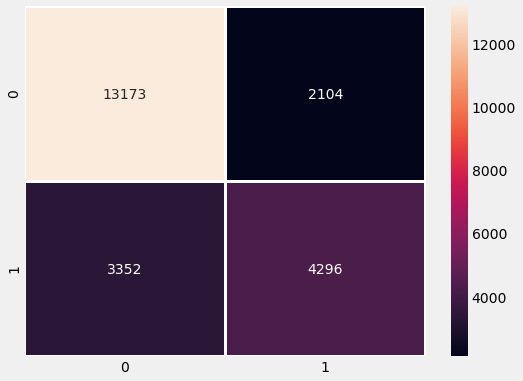

In [131]:
# confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, linewidth = 2, fmt = 'd')

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83     15277
           1       0.67      0.56      0.61      7648

    accuracy                           0.76     22925
   macro avg       0.73      0.71      0.72     22925
weighted avg       0.76      0.76      0.76     22925



### ROC-AUC Curve

In [133]:
pred_prob = log_reg.predict_proba(X_test)[:, 1]
pred_prob

array([0.54349386, 0.36710322, 0.06556537, ..., 0.04349041, 0.78698607,
       0.53144922])

In [134]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, pred_prob, pos_label = 1)

In [135]:
roc_auc_score(y_test, pred_prob)

0.81726795336359

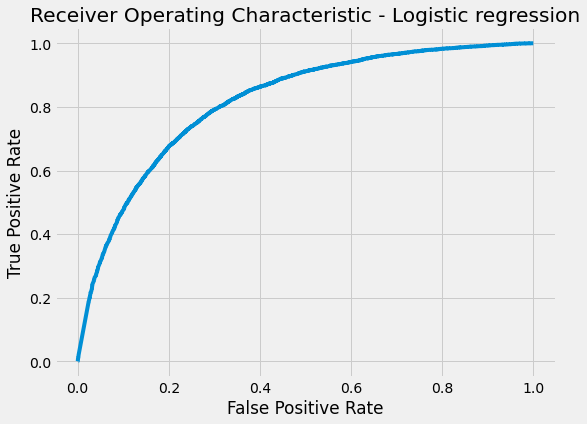

In [136]:
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate1, true_positive_rate1)
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [137]:
# coefficients
log_reg.coef_

array([[ 0.10401466,  0.50295995,  0.09680013, -0.66066634, -0.19170029,
        -0.05057831, -0.27113989, -2.18143443,  0.8947729 ,  0.52534911,
        -0.00873333,  0.37757155, -1.61999643,  0.81425166,  0.04014148,
         0.37920842, -0.05211623,  0.00504655, -0.59072017, -0.10639015,
         0.10759171,  0.25714881, -0.03888648,  0.01134766, -0.00457931,
         0.00457931]])

In [138]:
# convert to dataframe
coeff = pd.DataFrame(log_reg.coef_).T 

# add columns name as index
coeff.index = X.columns 

# print
coeff.rename(columns = {0 : 'coefficients'}, inplace=True)

In [139]:
coeff.sort_values('coefficients', ascending = False)

coefficients
W3_Max_Sale           0.894773
W4_Min_Sale           0.814252
W3_Min_Sale           0.525349
W1_Min_Sale           0.502960
W4_Visits             0.379208
W3_Visits             0.377572
week_4                0.257149
week_3                0.107592
STD_Sales             0.104015
W1_STD_Sales          0.096800
W4_STD_Sales          0.040141
Visitors_Type         0.011348
W5_Visits             0.005047
Regular_Visitors      0.004579
Rare_Visitors        -0.004579
W3_STD_Sales         -0.008733
Regular              -0.038886
W2_STD_Sales         -0.050578
W5_STD_Sales         -0.052116
week_2               -0.106390
W2_Min_Sale          -0.191700
W2_Visits            -0.271140
week_1               -0.590720
W1_Visits            -0.660666
W4_Sale              -1.619996
W3_Sale              -2.181434

In [140]:
# intercept
log_reg.intercept_

array([-1.01961303])

In [141]:
log_reg.n_features_in_

26

In [142]:
log_reg.n_iter_

array([100])

### Modelling: Support Vector Machine

In [71]:
# import SVC
from sklearn.svm import SVC 

# instantiate
svc_clf = SVC(kernel = 'rbf')

# train
svc_clf.fit(X_train, y_train)

SVC()

In [72]:
# predict
svc_y_pred = svc_clf.predict(X_test)

### Model Evaluation

In [73]:
# R2 score
svc_clf.score(X_train, y_train)

0.7674668838061448

In [74]:
# R2 score
svc_clf.score(X_test, y_test)

0.7624427480916031

In [75]:
confusion_matrix(y_test, svc_y_pred)

array([[13138,  2139],
       [ 3307,  4341]], dtype=int64)

<AxesSubplot:>

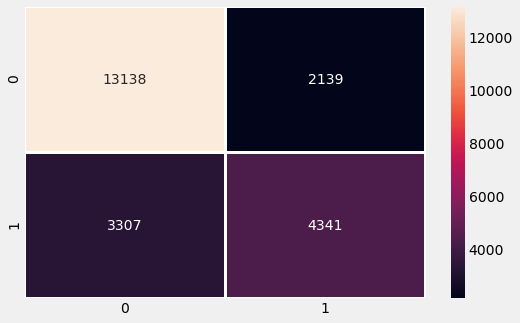

In [76]:
# heatmap
plt.figure(figsize = (8, 5))
sns.heatmap(confusion_matrix(y_test, svc_y_pred), annot = True, fmt = 'd', linewidth = 2)

In [ ]:
print(classification_report(y_test, svc_y_pred))

### Modelling: K-Nearest Neighbours

In [43]:
# import kNN class 
from sklearn.neighbors import KNeighborsClassifier 

# instantiate 
knn_clf = KNeighborsClassifier(n_neighbors=5)

# train 
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
knn_clf_y_pred = knn_clf.predict(X_test)

In [147]:
knn_clf.score(X_train, y_train)

0.7928402134558621

In [148]:
knn_clf.score(X_test, y_test)

0.7324754634678299

### Model Evaluation 

In [45]:
from sklearn.metrics import confusion_matrix, classification_report 

# confusion matrix 
confusion_matrix(y_test, knn_clf_y_pred)

array([[12777,  2500],
       [ 3633,  4015]], dtype=int64)

<AxesSubplot:>

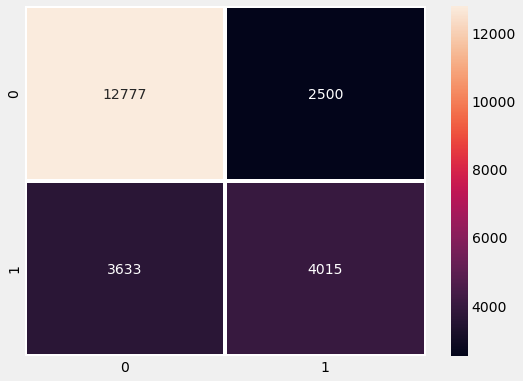

In [46]:
# heat map
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, knn_clf_y_pred), 
            annot = True, fmt = 'd', linewidth = 3)

In [48]:
# recall, precision, f1-score
print(classification_report(y_test, knn_clf_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81     15277
           1       0.62      0.52      0.57      7648

    accuracy                           0.73     22925
   macro avg       0.70      0.68      0.69     22925
weighted avg       0.72      0.73      0.73     22925



### Hyperparamters Tuning: Finding the optimal K-neighbors  using GridSearchCV

In [59]:
# import GridSearchCV 
from sklearn.model_selection import GridSearchCV 

In [60]:
n_neighbors = np.arange(1, 15) 
n_neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [62]:
params_grid = {'n_neighbors' : n_neighbors}

In [65]:
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid = params_grid, cv = 5)

In [66]:
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [71]:
results = pd.DataFrame(knn_grid.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        3.709592      6.584319        53.359453       21.389536   
1        0.828757      1.473246        53.188261       17.283447   
2        0.048198      0.018475        46.202646        0.437804   
3        0.044198      0.005230        64.133740       14.764160   
4        5.316601     10.544707        52.784182        1.595853   
5        0.039598      0.003007        51.162451        1.008475   
6        0.038198      0.001600        50.541600        0.848023   
7        0.039596      0.002244        50.953980        2.554312   
8        0.038998      0.003033        49.009465        1.889840   
9        0.038198      0.003544        49.989164        0.866035   
10       0.040398      0.005389        50.885274        0.688308   
11       0.040403      0.004221        50.864452        1.444612   
12       0.038998      0.002608        50.255067        0.506741   
13       0.038198      0.002039        50.189089        0.839034   

   param_n_neighbors               params  split0_test_score  \
0                  1   {'n_neighbors': 1}           0.651254   
1                  2   {'n_neighbors': 2}           0.684333   
2                  3   {'n_neighbors': 3}           0.682588   
3                  4   {'n_neighbors': 4}           0.741185   
4                  5   {'n_neighbors': 5}           0.739440   
5                  6   {'n_neighbors': 6}           0.743221   
6                  7   {'n_neighbors': 7}           0.743875   
7                  8   {'n_neighbors': 8}           0.747728   
8                  9   {'n_neighbors': 9}           0.745474   
9                 10  {'n_neighbors': 10}           0.750563   
10                11  {'n_neighbors': 11}           0.749400   
11                12  {'n_neighbors': 12}           0.755144   
12                13  {'n_neighbors': 13}           0.753980   
13                14  {'n_neighbors': 14}           0.754126   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.702944           0.708106           0.708667   
1            0.730643           0.733261           0.735713   
2            0.731516           0.731370           0.734477   
3            0.741112           0.701127           0.737167   
4            0.740967           0.743657           0.738113   
5            0.747583           0.746492           0.744074   
6            0.750345           0.741985           0.748800   
7            0.752817           0.708979           0.748946   
8            0.750200           0.747146           0.751563   
9            0.754780           0.750636           0.752581   
10           0.754344           0.752163           0.752872   
11           0.756743           0.754853           0.754762   
12           0.758561           0.756089           0.755562   
13           0.757397           0.757107           0.756144   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
0            0.695289         0.693252        0.021541               14  
1            0.724953         0.721781        0.019062               12  
2            0.724880         0.720966        0.019444               13  
3            0.698270         0.723772        0.019731               11  
4            0.733968         0.739229        0.003212               10  
5            0.741094         0.744493        0.002319                8  
6            0.739276         0.744856        0.004148                7  
7            0.743566         0.740407        0.015989                9  
8            0.741384         0.747154        0.003601                6  
9            0.743638         0.750440        0.003735                4  
10           0.742838         0.750323        0.004072                5  
11           0.748655         0.754031        0.002782                3  
12           0.749164         0.754671        0.003122                2  
13           0.749091         0.754773  

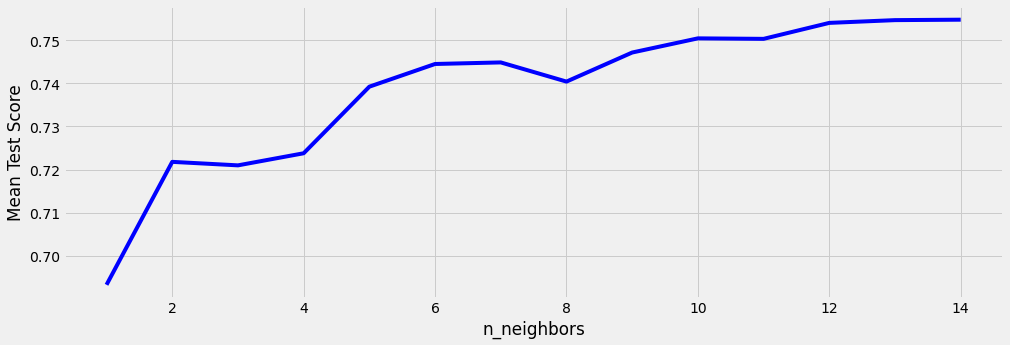

In [72]:
# plot the results 
plt.figure(figsize=(15, 5))
plt.plot(results.param_n_neighbors, results.mean_test_score, color = 'blue')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Test Score')
plt.show()

In [69]:
knn_grid.best_params_

{'n_neighbors': 14}

### Build a new classifier model with the Hyperparamaters

In [73]:
# import kNN class 
from sklearn.neighbors import KNeighborsClassifier 

# instantiate 
knn_grid_clf = KNeighborsClassifier(n_neighbors=14)

# train 
knn_grid_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [74]:
knn_grid_clf_y_pred = knn_grid_clf.predict(X_test)

### Model Evaluation

In [76]:
from sklearn.metrics import confusion_matrix, classification_report 

# confusion matrix 
confusion_matrix(y_test, knn_grid_clf_y_pred)

array([[13694,  1583],
       [ 5033,  2615]], dtype=int64)

<AxesSubplot:>

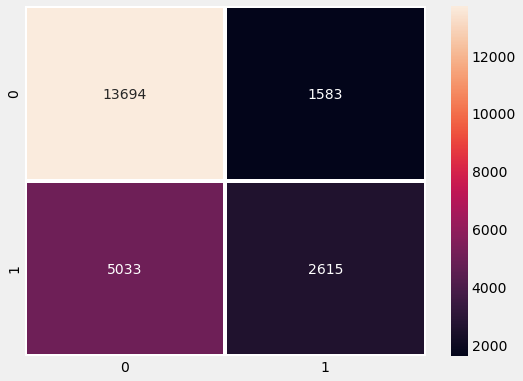

In [77]:
# heat map
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, knn_grid_clf_y_pred), 
            annot = True, fmt = 'd', linewidth = 3)

In [78]:
# recall, precision, f1-score
print(classification_report(y_test, knn_grid_clf_y_pred))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81     15277
           1       0.62      0.34      0.44      7648

    accuracy                           0.71     22925
   macro avg       0.68      0.62      0.62     22925
weighted avg       0.70      0.71      0.68     22925



### Modelling : Decision Tree

In [44]:
# import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 

# instantiate
dt_clf = DecisionTreeClassifier()

# train
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
# predict unseen data
dt_clf_y_pred = dt_clf.predict(X_test)
dt_clf_y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

### Model Evaluation

In [48]:
# R2-score
dt_clf.score(X_train, y_train)

0.8967472700042167

In [49]:
# R2-score
dt_clf.score(X_test, y_test)

0.7116684841875681

- the decision tree model overfitted

### Hyperparameter Tuning

In [50]:
# import GridSearchCV 
from sklearn.model_selection import GridSearchCV 

In [58]:
# max depth 
max_depth = np.arange(1, 16)
param_grid = {'max_depth' : max_depth}

In [59]:
dt_clf_grid = GridSearchCV(DecisionTreeClassifier(), param_grid = param_grid, cv = 5)

In [60]:
dt_clf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])})

In [61]:
dt_grid_results = pd.DataFrame(dt_clf_grid.cv_results_)
dt_grid_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.248384      0.088486         0.012200        0.001326   
1        0.345579      0.061969         0.018400        0.016823   
2        0.376978      0.091558         0.009000        0.002607   
3        0.332980      0.010217         0.009000        0.003162   
4        0.351579      0.012467         0.007200        0.000980   
5        0.376178      0.008818         0.006800        0.000400   
6        0.409976      0.002450         0.007400        0.000800   
7        0.448173      0.012686         0.008000        0.001095   
8        0.475372      0.005276         0.007801        0.000400   
9        0.503969      0.005177         0.007600        0.000800   
10       0.546568      0.014799         0.008400        0.000490   
11       0.617963      0.097733         0.008200        0.001166   
12       0.634362      0.046938         0.008200        0.000749   
13       0.620363      0.009350         0.008600        0.001200   
14       0.687359      0.080209         0.008600        0.001020   

   param_max_depth             params  split0_test_score  split1_test_score  \
0                1   {'max_depth': 1}           0.705925           0.711887   
1                2   {'max_depth': 2}           0.746274           0.751145   
2                3   {'max_depth': 3}           0.750491           0.754635   
3                4   {'max_depth': 4}           0.762123           0.760523   
4                5   {'max_depth': 5}           0.765540           0.769902   
5                6   {'max_depth': 6}           0.767648           0.768957   
6                7   {'max_depth': 7}           0.764813           0.767357   
7                8   {'max_depth': 8}           0.765176           0.767285   
8                9   {'max_depth': 9}           0.762632           0.764231   
9               10  {'max_depth': 10}           0.761250           0.765104   
10              11  {'max_depth': 11}           0.760960           0.763359   
11              12  {'max_depth': 12}           0.753908           0.759651   
12              13  {'max_depth': 13}           0.754707           0.755362   
13              14  {'max_depth': 14}           0.749182           0.755071   
14              15  {'max_depth': 15}           0.745474           0.751072   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0            0.707961           0.707649           0.704740         0.707632   
1            0.746565           0.742620           0.741748         0.745670   
2            0.749546           0.746983           0.744365         0.749204   
3            0.762632           0.758034           0.754544         0.759571   
4            0.764377           0.762760           0.760579         0.764631   
5            0.766848           0.764069           0.763123         0.766129   
6            0.764958           0.764868           0.758179         0.764035   
7            0.766848           0.764578           0.762905         0.765358   
8            0.764813           0.763487           0.761160         0.763265   
9            0.761832           0.763269           0.757162         0.761723   
10           0.761905           0.758979           0.753381         0.759717   
11           0.756525           0.756653           0.750545         0.755456   
12           0.754853           0.753890           0.750254         0.753813   
13           0.749328           0.752363           0.748800         0.750949   
14           0.748019           0.746328           0.746692         0.747517   

    std_test_score  rank_test_score  
0         0.002428               15  
1         0.003341               14  
2         0.003453               12  
3         0.002981                8  
4         0.003118                3  
5         0.002195                1  
6         0.003081                4  
7         0.001587                2  
8         0.001281         

In [63]:
dt_clf_grid.best_params_

{'max_depth': 6}

### Modelling with Hyperparameters

In [65]:
# instantiate
dt_grid = DecisionTreeClassifier(max_depth= 6)

# train
dt_grid.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [66]:
# predict unseen data
dt_grid_y_pred = dt_grid.predict(X_test)
dt_grid_y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

### Model Evaluation

In [67]:
# R2-score
dt_grid.score(X_train, y_train)

0.7686155904206593

In [68]:
# R2-score
dt_clf.score(X_test, y_test)

0.7635332606324973

In [69]:
from sklearn.metrics import confusion_matrix, classification_report 

# confusion matrix 
confusion_matrix(y_test, dt_grid_y_pred)

array([[13089,  2188],
       [ 3230,  4418]], dtype=int64)

<AxesSubplot:>

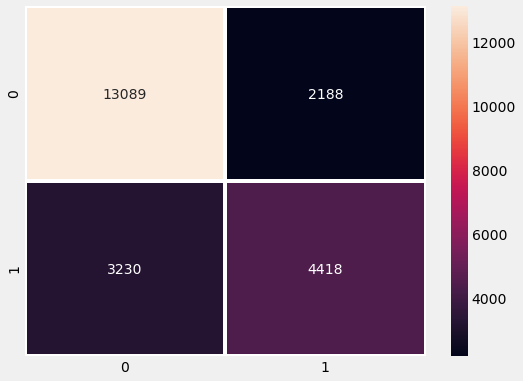

In [70]:
# heat map
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, dt_grid_y_pred), 
            annot = True, fmt = 'd', linewidth = 3)

In [72]:
# classification report 
print(classification_report(y_test, dt_grid_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83     15277
           1       0.67      0.58      0.62      7648

    accuracy                           0.76     22925
   macro avg       0.74      0.72      0.72     22925
weighted avg       0.76      0.76      0.76     22925



#### Decision Tree generalized better on the test data than k-Nearest Neighbors

[Text(316.67298387096776, 324.9257142857144, 'Regular_Visitors <= -0.042\ngini = 0.442\nsamples = 68773\nvalue = [46066, 22707]\nclass = 0'),
 Text(161.6516129032258, 274.93714285714293, 'W2_Min_Sale <= -0.809\ngini = 0.497\nsamples = 32936\nvalue = [15168, 17768]\nclass = 1'),
 Text(80.8258064516129, 224.94857142857148, 'W3_Sale <= -0.104\ngini = 0.461\nsamples = 18638\nvalue = [6711, 11927]\nclass = 1'),
 Text(40.41290322580645, 174.96000000000004, 'W1_Min_Sale <= 0.261\ngini = 0.395\nsamples = 10449\nvalue = [2829, 7620]\nclass = 1'),
 Text(20.206451612903226, 124.97142857142859, 'STD_Sales <= 1.468\ngini = 0.356\nsamples = 7326\nvalue = [1695, 5631]\nclass = 1'),
 Text(10.103225806451613, 74.98285714285714, 'W4_Sale <= 0.063\ngini = 0.349\nsamples = 7179\nvalue = [1614, 5565]\nclass = 1'),
 Text(5.051612903225807, 24.994285714285695, 'gini = 0.332\nsamples = 5201\nvalue = [1095, 4106]\nclass = 1'),
 Text(15.15483870967742, 24.994285714285695, 'gini = 0.387\nsamples = 1978\nvalue = 

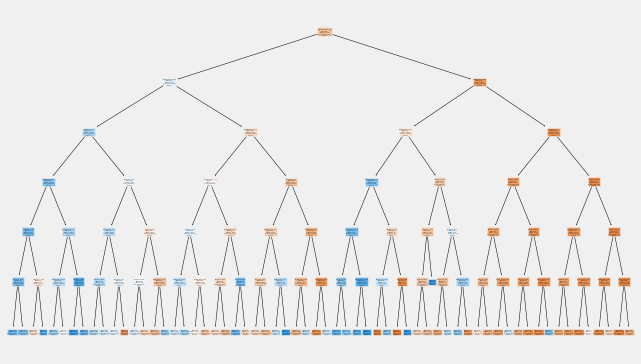

In [77]:
# import plot tree
from sklearn.tree import plot_tree 

fig = plt.figure(figsize=(10, 6))
plot_tree(dt_grid, 
                   feature_names=X.columns,  
                   class_names=['0', '1'],
                   filled=True)

### Modelling: RandomForestClassifier

In [47]:
# import kNN class 
from sklearn.ensemble import RandomForestClassifier 

# instantiate 
rf_clf = RandomForestClassifier()

# train 
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
# predict unseen test data
rf_clf_y_pred = rf_clf.predict(X_test)
rf_clf_y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

### Model Evaluation

In [49]:
# R2-score 
rf_clf.score(X_train, y_train)

0.8967327294141596

In [50]:
# R2-score 
rf_clf.score(X_test, y_test)

0.750577971646674

In [51]:
# import metrics class
from sklearn.metrics import confusion_matrix, classification_report

# confusion matrix 
confusion_matrix(y_test, rf_clf_y_pred)

array([[12752,  2525],
       [ 3193,  4455]], dtype=int64)

<AxesSubplot:>

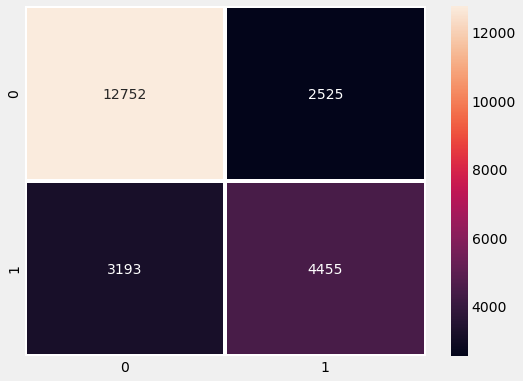

In [52]:
# heat map
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, rf_clf_y_pred), 
            annot = True, fmt = 'd', linewidth = 3)

In [56]:
# classification report(y_test, )
print(classification_report(y_test, rf_clf_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82     15277
           1       0.64      0.58      0.61      7648

    accuracy                           0.75     22925
   macro avg       0.72      0.71      0.71     22925
weighted avg       0.75      0.75      0.75     22925



### Modelling: AdaBoost Classifier

In [27]:
# import AdaBoost class 
from sklearn.ensemble import AdaBoostClassifier 

# instantiate 
ab_clf = AdaBoostClassifier(n_estimators = 100)

# train 
ab_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [28]:
# predict unseen test data 
ab_clf_y_pred = ab_clf.predict(X_test)
ab_clf_y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

### Model Evaluation

In [29]:
# R2-score
ab_clf.score(X_train, y_train)

0.7654312011981447

In [30]:
# R2-score
ab_clf.score(X_test, y_test)

0.7656270447110142

In [31]:
# import metrics
from sklearn.metrics import confusion_matrix, classification_report 

# confusion_matrix 
confusion_matrix(y_test, ab_clf_y_pred)

array([[13051,  2226],
       [ 3147,  4501]], dtype=int64)

<AxesSubplot:>

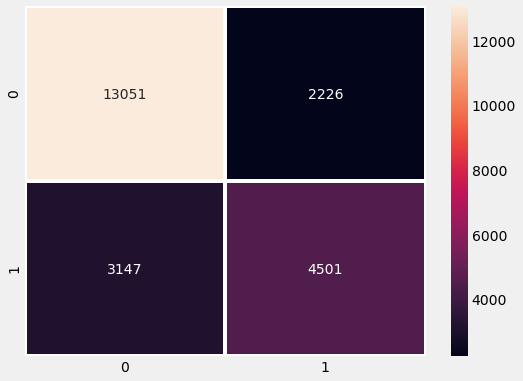

In [32]:
# heat map
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, ab_clf_y_pred), 
            annot = True, fmt = 'd', linewidth = 3)

In [33]:
# recall, precision, f1-score
print(classification_report(y_test, ab_clf_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     15277
           1       0.67      0.59      0.63      7648

    accuracy                           0.77     22925
   macro avg       0.74      0.72      0.73     22925
weighted avg       0.76      0.77      0.76     22925



In [34]:
# import Gboost class 
from sklearn.ensemble import GradientBoostingClassifier 

# instantiate 
gb_clf = GradientBoostingClassifier(n_estimators = 250, learning_rate=1)

# train 
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=250)

In [36]:
# predict unseen test data 
gb_clf_y_pred = gb_clf.predict(X_test)
gb_clf_y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [37]:
# R2-score
gb_clf.score(X_train, y_train)

0.7769035146825483

In [38]:
# R2-score
gb_clf.score(X_test, y_test)

0.6993348982785602

In [41]:
# import metrics
from sklearn.metrics import confusion_matrix, classification_report 

# confusion_matrix 
confusion_matrix(y_test, gb_clf_y_pred)

array([[10029,  5397],
       [ 3825, 11421]], dtype=int64)

<AxesSubplot:>

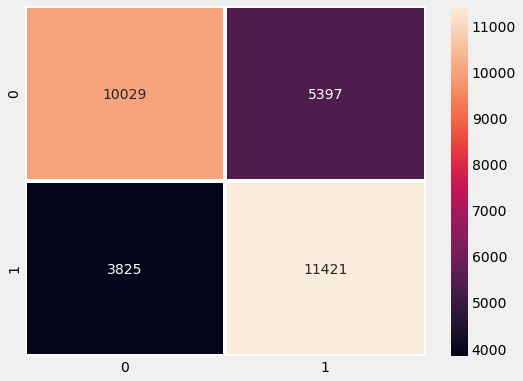

In [42]:
# heat map
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, gb_clf_y_pred), 
            annot = True, fmt = 'd', linewidth = 3)

In [44]:
# recall, precision, f1-score
print(classification_report(y_test, gb_clf_y_pred))

              precision    recall  f1-score   support

           0       0.72      0.65      0.69     15426
           1       0.68      0.75      0.71     15246

    accuracy                           0.70     30672
   macro avg       0.70      0.70      0.70     30672
weighted avg       0.70      0.70      0.70     30672

